#### Import 

In [312]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#from google.colab.data_table import DataTable
import geopandas as gpd
from matplotlib.lines import Line2D
pd.set_option('display.max_columns', 100)
#DataTable.max_columns = 1000
import warnings
warnings.filterwarnings("ignore")

In [313]:
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.nonparametric.kde import KDEUnivariate
import plotly.figure_factory as ff

In [314]:
#from google.colab import drive
#drive.mount('/content/drive')

## Import data

In [315]:
url = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-dataset/main/data/OxCGRT_compact_national_v1.csv'

df = pd.read_csv(url)

## Data Description and Wrangling

In [316]:
print('The shape of our dataset is {}.'.format(df.shape))
print('Displaying the first 5 entries')
df.head()

The shape of our dataset is (202760, 56).
Displaying the first 5 entries


CountryName CountryCode  RegionName  RegionCode Jurisdiction      Date  \
0       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200101   
1       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200102   
2       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200103   
3       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200104   
4       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200105   

   C1M_School closing  C1M_Flag  C2M_Workplace closing  C2M_Flag  \
0                 0.0       NaN                    0.0       NaN   
1                 0.0       NaN                    0.0       NaN   
2                 0.0       NaN                    0.0       NaN   
3                 0.0       NaN                    0.0       NaN   
4                 0.0       NaN                    0.0       NaN   

   C3M_Cancel public events  C3M_Flag  C4M_Restrictions on gatherings  \
0                       0.0       NaN                             0.0   
1                       0.0       NaN                             0.0   
2                       0.0       NaN                             0.0   
3                       0.0       NaN                             0.0   
4                       0.0       NaN                             0.0   

   C4M_Flag  C5M_Close public transport  C5M_Flag  \
0       NaN                         0.0       NaN   
1       NaN                         0.0       NaN   
2       NaN                         0.0       NaN   
3       NaN                         0.0       NaN   
4       NaN                         0.0       NaN   

   C6M_Stay at home requirements  C6M_Flag  \
0                            0.0       NaN   
1                            0.0       NaN   
2                            0.0       NaN   
3                            0.0       NaN   
4                            0.0       NaN   

   C7M_Restrictions on internal movement  C7M_Flag  \
0                                    0.0       NaN   
1                                    0.0       NaN   
2                                    0.0       NaN   
3                                    0.0       NaN   
4                                    0.0       NaN   

   C8EV_International travel controls  E1_Income support  E1_Flag  \
0                                 0.0                0.0      NaN   
1                                 0.0                0.0      NaN   
2                                 0.0                0.0      NaN   
3                                 0.0                0.0      NaN   
4                                 0.0                0.0      NaN   

   E2_Debt/contract relief  E3_Fiscal measures  E4_International support  \
0                      0.0                 0.0                       0.0   
1                      0.0                 0.0                       0.0   
2                      0.0                 0.0                       0.0   
3                      0.0                 0.0                       0.0   
4                      0.0                 0.0                       0.0   

   H1_Public information campaigns  H1_Flag  H2_Testing policy  \
0                              0.0      NaN                0.0   
1                              0.0      NaN                0.0   
2                              0.0      NaN                0.0   
3                              0.0      NaN                0.0   
4                              0.0      NaN                0.0   

   H3_Contact tracing  H4_Emergency investment in healthcare  \
0                 0.0                                    0.0   
1                 0.0                                    0.0   
2                 0.0                                    0.0   
3                 0.0                                    0.0   
4                 0.0                                    0.0   

   H5_Investment in vaccines  H6M_Facial Coverings  H6M_Flag  \
0                        0.0                   0.0       N

##### View the output of df.head() in a tabular format.

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202760 entries, 0 to 202759
Data columns (total 56 columns):
 #   Column                                                                           Non-Null Count   Dtype  
---  ------                                                                           --------------   -----  
 0   CountryName                                                                      202760 non-null  object 
 1   CountryCode                                                                      202760 non-null  object 
 2   RegionName                                                                       0 non-null       float64
 3   RegionCode                                                                       0 non-null       float64
 4   Jurisdiction                                                                     202760 non-null  object 
 5   Date                                                                             202760 non-null  int64  
 



*   Columns 'RegionName' and 'RegionCode' will be dropped since they contain 0 non-null entries.
*  Column 'CountryName' is dropped to avoid redundancy.



#### Converting 'Date' to datetime.

In [318]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
start_date = df['Date'].min()
end_date = df['Date'].max()
print("Start Date: {}, End Date: {}".format(start_date,end_date))

Start Date: 2020-01-01 00:00:00, End Date: 2022-12-31 00:00:00


In [319]:
df = df.drop(columns=['RegionName','RegionCode','CountryName'])
print(df.shape)

(202760, 53)


#### Additional Data from OWID

In [320]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
owid = pd.read_csv(url)


In [321]:
owid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390613 entries, 0 to 390612
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    390613 non-null  object 
 1   continent                                   371945 non-null  object 
 2   location                                    390613 non-null  object 
 3   date                                        390613 non-null  object 
 4   total_cases                                 351749 non-null  float64
 5   new_cases                                   379668 non-null  float64
 6   new_cases_smoothed                          378438 non-null  float64
 7   total_deaths                                329441 non-null  float64
 8   new_deaths                                  379991 non-null  float64
 9   new_deaths_smoothed                         378761 non-null  float64
 

In [322]:
countries = df['CountryCode'].unique()
print("Number of countries in the dataset: ", len(countries))

countriesOWID = owid['iso_code'].unique()
print("Number of countries in owid dataset: ", len(countriesOWID))

Number of countries in the dataset:  185
Number of countries in owid dataset:  255


In [323]:
countriesWithOwidData = np.intersect1d(countries, countriesOWID)
missing_countries = np.setdiff1d(countries, countriesWithOwidData)
print(missing_countries)

['RKS']


In [324]:
df = df[~df['CountryCode'].isin(missing_countries)]

In [325]:
df.shape

(201664, 53)

In [326]:
owid['date'] = pd.to_datetime(owid['date'], format='%Y-%m-%d')

additional_data = owid[owid['iso_code'].isin(countriesWithOwidData) & 
                    (owid['date'] >= start_date) & 
                    (owid['date'] <= end_date)][['iso_code', 'date', 'population', 'gdp_per_capita']]

In [327]:
additional_data[additional_data['iso_code'] == 'AFG']

iso_code       date  population  gdp_per_capita
0         AFG 2020-01-05  41128772.0        1803.987
1         AFG 2020-01-06  41128772.0        1803.987
2         AFG 2020-01-07  41128772.0        1803.987
3         AFG 2020-01-08  41128772.0        1803.987
4         AFG 2020-01-09  41128772.0        1803.987
...       ...        ...         ...             ...
1087      AFG 2022-12-27  41128772.0        1803.987
1088      AFG 2022-12-28  41128772.0        1803.987
1089      AFG 2022-12-29  41128772.0        1803.987
1090      AFG 2022-12-30  41128772.0        1803.987
1091      AFG 2022-12-31  41128772.0        1803.987

[1092 rows x 4 columns]

In [328]:
additional_data.isna().sum()

iso_code              0
date                  0
population            0
gdp_per_capita    12001
dtype: int64

In [329]:
additional_data.nunique()

iso_code           184
date              1096
population         184
gdp_per_capita     173
dtype: int64

In [330]:
num_unique_values = additional_data.groupby('iso_code')['gdp_per_capita'].nunique()
countriesWithNoGDP = num_unique_values[num_unique_values < 1].index
countriesWithNoGDP

Index(['AND', 'CUB', 'FRO', 'GRL', 'GUM', 'LIE', 'MCO', 'SOM', 'SYR', 'TWN',
       'VIR'],
      dtype='object', name='iso_code')

In [331]:
additional_data = additional_data[~additional_data['iso_code'].isin(countriesWithNoGDP)]
additional_data.isna().sum()

iso_code          0
date              0
population        0
gdp_per_capita    0
dtype: int64

In [332]:
df = df.merge(additional_data, left_on=['CountryCode', 'Date'], right_on=['iso_code','date'], how='left')

In [333]:
df.head()

CountryCode Jurisdiction       Date  C1M_School closing  C1M_Flag  \
0         ABW    NAT_TOTAL 2020-01-01                 0.0       NaN   
1         ABW    NAT_TOTAL 2020-01-02                 0.0       NaN   
2         ABW    NAT_TOTAL 2020-01-03                 0.0       NaN   
3         ABW    NAT_TOTAL 2020-01-04                 0.0       NaN   
4         ABW    NAT_TOTAL 2020-01-05                 0.0       NaN   

   C2M_Workplace closing  C2M_Flag  C3M_Cancel public events  C3M_Flag  \
0                    0.0       NaN                       0.0       NaN   
1                    0.0       NaN                       0.0       NaN   
2                    0.0       NaN                       0.0       NaN   
3                    0.0       NaN                       0.0       NaN   
4                    0.0       NaN                       0.0       NaN   

   C4M_Restrictions on gatherings  C4M_Flag  C5M_Close public transport  \
0                             0.0       NaN                         0.0   
1                             0.0       NaN                         0.0   
2                             0.0       NaN                         0.0   
3                             0.0       NaN                         0.0   
4                             0.0       NaN                         0.0   

   C5M_Flag  C6M_Stay at home requirements  C6M_Flag  \
0       NaN                            0.0       NaN   
1       NaN                            0.0       NaN   
2       NaN                            0.0       NaN   
3       NaN                            0.0       NaN   
4       NaN                            0.0       NaN   

   C7M_Restrictions on internal movement  C7M_Flag  \
0                                    0.0       NaN   
1                                    0.0       NaN   
2                                    0.0       NaN   
3                                    0.0       NaN   
4                                    0.0       NaN   

   C8EV_International travel controls  E1_Income support  E1_Flag  \
0                                 0.0                0.0      NaN   
1                                 0.0                0.0      NaN   
2                                 0.0                0.0      NaN   
3                                 0.0                0.0      NaN   
4                                 0.0                0.0      NaN   

   E2_Debt/contract relief  E3_Fiscal measures  E4_International support  \
0                      0.0                 0.0                       0.0   
1                      0.0                 0.0                       0.0   
2                      0.0                 0.0                       0.0   
3                      0.0                 0.0                       0.0   
4                      0.0                 0.0                       0.0   

   H1_Public information campaigns  H1_Flag  H2_Testing policy  \
0                              0.0      NaN                0.0   
1                              0.0      NaN                0.0   
2                              0.0      NaN                0.0   
3                              0.0      NaN                0.0   
4                              0.0      NaN                0.0   

   H3_Contact tracing  H4_Emergency investment in healthcare  \
0                 0.0                                    0.0   
1                 0.0                                    0.0   
2                 0.0                                    0.0   
3                 0.0                                    0.0   
4                 0.0                                    0.0   

   H5_Investment in vaccines  H6M_Facial Coverings  H6M_Flag  \
0                        0.0                   0.0       NaN   
1                        0.0                   0.0       NaN   
2                        0.0                   0.0       NaN   
3                        0.0                   0.0       NaN   
4                        0.0               

In [334]:
population_values = df.loc[df['Date'] == pd.Timestamp('2020-01-05')].groupby('CountryCode')['population'].first().to_dict()
gdp_values = df.loc[df['Date'] == pd.Timestamp('2020-01-05')].groupby('CountryCode')['gdp_per_capita'].first().to_dict()

column_values = {
    'population': population_values,
    'gdp_per_capita': gdp_values
}

mask = (df['Date'] < pd.Timestamp('2020-01-05'))

for column, values in column_values.items():
    df.loc[mask, column] = df.loc[mask, 'CountryCode'].map(values)

In [335]:
df.head()

CountryCode Jurisdiction       Date  C1M_School closing  C1M_Flag  \
0         ABW    NAT_TOTAL 2020-01-01                 0.0       NaN   
1         ABW    NAT_TOTAL 2020-01-02                 0.0       NaN   
2         ABW    NAT_TOTAL 2020-01-03                 0.0       NaN   
3         ABW    NAT_TOTAL 2020-01-04                 0.0       NaN   
4         ABW    NAT_TOTAL 2020-01-05                 0.0       NaN   

   C2M_Workplace closing  C2M_Flag  C3M_Cancel public events  C3M_Flag  \
0                    0.0       NaN                       0.0       NaN   
1                    0.0       NaN                       0.0       NaN   
2                    0.0       NaN                       0.0       NaN   
3                    0.0       NaN                       0.0       NaN   
4                    0.0       NaN                       0.0       NaN   

   C4M_Restrictions on gatherings  C4M_Flag  C5M_Close public transport  \
0                             0.0       NaN                         0.0   
1                             0.0       NaN                         0.0   
2                             0.0       NaN                         0.0   
3                             0.0       NaN                         0.0   
4                             0.0       NaN                         0.0   

   C5M_Flag  C6M_Stay at home requirements  C6M_Flag  \
0       NaN                            0.0       NaN   
1       NaN                            0.0       NaN   
2       NaN                            0.0       NaN   
3       NaN                            0.0       NaN   
4       NaN                            0.0       NaN   

   C7M_Restrictions on internal movement  C7M_Flag  \
0                                    0.0       NaN   
1                                    0.0       NaN   
2                                    0.0       NaN   
3                                    0.0       NaN   
4                                    0.0       NaN   

   C8EV_International travel controls  E1_Income support  E1_Flag  \
0                                 0.0                0.0      NaN   
1                                 0.0                0.0      NaN   
2                                 0.0                0.0      NaN   
3                                 0.0                0.0      NaN   
4                                 0.0                0.0      NaN   

   E2_Debt/contract relief  E3_Fiscal measures  E4_International support  \
0                      0.0                 0.0                       0.0   
1                      0.0                 0.0                       0.0   
2                      0.0                 0.0                       0.0   
3                      0.0                 0.0                       0.0   
4                      0.0                 0.0                       0.0   

   H1_Public information campaigns  H1_Flag  H2_Testing policy  \
0                              0.0      NaN                0.0   
1                              0.0      NaN                0.0   
2                              0.0      NaN                0.0   
3                              0.0      NaN                0.0   
4                              0.0      NaN                0.0   

   H3_Contact tracing  H4_Emergency investment in healthcare  \
0                 0.0                                    0.0   
1                 0.0                                    0.0   
2                 0.0                                    0.0   
3                 0.0                                    0.0   
4                 0.0                                    0.0   

   H5_Investment in vaccines  H6M_Facial Coverings  H6M_Flag  \
0                        0.0                   0.0       NaN   
1                        0.0                   0.0       NaN   
2                        0.0                   0.0       NaN   
3                        0.0                   0.0       NaN   
4                        0.0               

In [336]:
df.shape

(201664, 57)

In [337]:
non_datetime_columns = df.select_dtypes(exclude=['datetime64[ns]']).columns

values_of_each_column = {col: df[col].value_counts(dropna=False) for col in non_datetime_columns}

values_of_each_column

{'CountryCode': CountryCode
 ABW    1096
 OMN    1096
 MYS    1096
 NAM    1096
 NER    1096
        ... 
 GIN    1096
 GMB    1096
 GRC    1096
 GRL    1096
 ZWE    1096
 Name: count, Length: 184, dtype: int64,
 'Jurisdiction': Jurisdiction
 NAT_TOTAL    201664
 Name: count, dtype: int64,
 'C1M_School closing': C1M_School closing
 0.0    74426
 1.0    55439
 3.0    41060
 2.0    30739
 Name: count, dtype: int64,
 'C1M_Flag': C1M_Flag
 1.0    106116
 NaN     74426
 0.0     21122
 Name: count, dtype: int64,
 'C2M_Workplace closing': C2M_Workplace closing
 0.0    68862
 2.0    63829
 1.0    51701
 3.0    17272
 Name: count, dtype: int64,
 'C2M_Flag': C2M_Flag
 1.0    105720
 NaN     68862
 0.0     27082
 Name: count, dtype: int64,
 'C3M_Cancel public events': C3M_Cancel public events
 2.0    84447
 0.0    64114
 1.0    53103
 Name: count, dtype: int64,
 'C3M_Flag': C3M_Flag
 1.0    117991
 NaN     64114
 0.0     19559
 Name: count, dtype: int64,
 'C4M_Restrictions on gatherings': C4M_Res


*   We've 1096 entries for each country, having a total of 185 countries represented in this dataset.
*   Dropping 'Jurisdiction' since it has only one unique value.



In [338]:
df = df.drop(columns=['Jurisdiction','iso_code','date'])
print(df.shape)

(201664, 54)


#### Converting object dtypes to categorical

Useful for plotting V2B, V2C and Majority Vaccinated.

In [339]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')


### Renaming columns

In [340]:

df.columns = [col.split('_')[0] if ' ' in col else col for col in df.columns]
df = df.rename(columns={'population': 'Population', 'gdp_per_capita':'GDP_Per_Capita'})
df.head(1)

CountryCode       Date  C1M  C1M_Flag  C2M  C2M_Flag  C3M  C3M_Flag  C4M  \
0         ABW 2020-01-01  0.0       NaN  0.0       NaN  0.0       NaN  0.0   

   C4M_Flag  C5M  C5M_Flag  C6M  C6M_Flag  C7M  C7M_Flag  C8EV   E1  E1_Flag  \
0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   0.0  0.0      NaN   

    E2   E3   E4   H1  H1_Flag   H2   H3   H4   H5  H6M  H6M_Flag   H7  \
0  0.0  0.0  0.0  0.0      NaN  0.0  0.0  0.0  0.0  0.0       NaN  0.0   

   H7_Flag  H8M  H8M_Flag  V1  V2A  V2B  V2C  V2D  V2E_Education  V2F  V2G  \
0      NaN  0.0       NaN   0    0  NaN  NaN  NaN            NaN  NaN  NaN   

   V3  V4  ConfirmedCases  ConfirmedDeaths MajorityVaccinated  \
0   0 NaN             0.0              0.0                 NV   

   PopulationVaccinated  StringencyIndex_Average  \
0                   0.0                      0.0   

   GovernmentResponseIndex_Average  ContainmentHealthIndex_Average  \
0                              0.0                             0.0   

   EconomicSupportIndex  Population  GDP_Per_Capita  
0                   0.0    106459.0       35973.781

In [341]:
df.shape

(201664, 54)

In [342]:
df.dtypes

CountryCode                              category
Date                               datetime64[ns]
C1M                                       float64
C1M_Flag                                  float64
C2M                                       float64
C2M_Flag                                  float64
C3M                                       float64
C3M_Flag                                  float64
C4M                                       float64
C4M_Flag                                  float64
C5M                                       float64
C5M_Flag                                  float64
C6M                                       float64
C6M_Flag                                  float64
C7M                                       float64
C7M_Flag                                  float64
C8EV                                      float64
E1                                        float64
E1_Flag                                   float64
E2                                        float64


### Dealing With Missing Values

In [343]:
na_values = df.isna().sum()

In [344]:
fig = go.Figure(layout=go.Layout(
        autosize=False,
        width=800,
        height=800
    ))
fig.add_trace(go.Bar(
    y = na_values.index,
    x = na_values.values,
    customdata = na_values.values,
    orientation='h'
))

fig.update_layout(
    title='Number of missing values in each column',
    xaxis_title='Missing values',
    yaxis_title='Columns',
    hovermode='closest',
    yaxis=dict(
        tickmode='array',
        tickvals=list(range(len(na_values.index))),
        ticktext=na_values.index
    )
)

fig.show()

In [345]:
missing_values = df.isnull().groupby(df['CountryCode']).any()

In [346]:
countries_with_no_missing_values = missing_values[~missing_values.any(axis=1)].index.tolist()
countries_with_no_missing_values

[]

In [347]:
missing_values1 = df.isnull().groupby(df['CountryCode']).sum()

In [348]:
countries_sumMissing = missing_values1.sum(axis=1)
totalValues = 58088
countriesMissProb = (countries_sumMissing/totalValues) * 100
print(countriesMissProb.sort_values(ascending=True))
print(len(countriesMissProb))


CountryCode
CHN     9.007024
DEU    11.236400
HKG    11.718427
GRC    11.840656
IDN    12.000757
         ...    
TZA    26.473626
ERI    26.633728
BFA    26.726691
TKM    26.874742
BDI    27.084768
Length: 184, dtype: float64
184


#### Drop entries where 'ConfirmedCases' and 'ConfirmedDeaths' are NaNs

In [349]:
df_ccd = df

df = df.dropna(subset=['ConfirmedCases', 'ConfirmedDeaths'])
print(df.shape)

(200568, 54)


In [350]:
whichCountry = set(df_ccd['CountryCode'].unique()) - set(df['CountryCode'].unique())
print(whichCountry)

{'TKM'}


##### No data on confirmed cases and deaths for Turkmenistan.

#### Drop 'MajorityVaccinated' and 'PopulationVaccinated' are missing

In [351]:
#df_vacc = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')
df_vc = df

In [352]:
df = df.dropna(subset=['MajorityVaccinated', 'PopulationVaccinated'])
print(df.shape)

(199472, 54)


In [353]:
df_vc.shape[0] - df.shape[0]

1096

In [354]:
whichCountry = set(df_vc['CountryCode'].unique()) - set(df['CountryCode'].unique())
print(whichCountry)

{'ERI'}


##### Eritrea's vaccination data is missing.

#### Removing duplicates

In [355]:
df = df.drop_duplicates()

#### Reset the index of our dataframe

In [356]:
df = df.reset_index(drop=True)

In [357]:
print(df.shape)

(199472, 54)


 We didn't have any duplicate entries in the dataset.

In [358]:
#df.to_csv('output2.csv', index=False)

In [359]:
na_values = df.isna().sum()
fig = go.Figure(layout=go.Layout(
        autosize=False,
        width=800,
        height=800
    ))
fig.add_trace(go.Bar(
    y = na_values.index,
    x = na_values.values,
    customdata = na_values.values,
    orientation='h'
))

fig.update_layout(
    title='Number of missing values in each column',
    xaxis_title='Missing values',
    yaxis_title='Columns',
    hovermode='closest',
    yaxis=dict(
        tickmode='array',
        tickvals=list(range(len(na_values.index))),
        ticktext=na_values.index
    )
)

fig.show()

In [284]:
df

CountryCode       Date  C1M  C1M_Flag  C2M  C2M_Flag  C3M  C3M_Flag  \
0              ABW 2020-01-01  0.0       NaN  0.0       NaN  0.0       NaN   
1              ABW 2020-01-02  0.0       NaN  0.0       NaN  0.0       NaN   
2              ABW 2020-01-03  0.0       NaN  0.0       NaN  0.0       NaN   
3              ABW 2020-01-04  0.0       NaN  0.0       NaN  0.0       NaN   
4              ABW 2020-01-05  0.0       NaN  0.0       NaN  0.0       NaN   
...            ...        ...  ...       ...  ...       ...  ...       ...   
199467         ZWE 2022-12-27  1.0       1.0  2.0       1.0  1.0       1.0   
199468         ZWE 2022-12-28  1.0       1.0  2.0       1.0  1.0       1.0   
199469         ZWE 2022-12-29  1.0       1.0  2.0       1.0  1.0       1.0   
199470         ZWE 2022-12-30  1.0       1.0  2.0       1.0  1.0       1.0   
199471         ZWE 2022-12-31  1.0       1.0  2.0       1.0  1.0       1.0   

        C4M  C4M_Flag  C5M  C5M_Flag  C6M  C6M_Flag  C7M  C7M_Flag  C8EV   E1  \
0       0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   0.0  0.0   
1       0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   0.0  0.0   
2       0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   0.0  0.0   
3       0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   0.0  0.0   
4       0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   0.0  0.0   
...     ...       ...  ...       ...  ...       ...  ...       ...   ...  ...   
199467  0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   1.0  0.0   
199468  0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   1.0  0.0   
199469  0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   1.0  0.0   
199470  0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   1.0  0.0   
199471  0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   1.0  0.0   

        E1_Flag   E2   E3   E4   H1  H1_Flag   H2   H3   H4   H5  H6M  \
0           NaN  0.0  0.0  0.0  0.0      NaN  0.0  0.0  0.0  0.0  0.0   
1           NaN  0.0  0.0  0.0  0.0      NaN  0.0  0.0  0.0  0.0  0.0   
2           NaN  0.0  0.0  0.0  0.0      NaN  0.0  0.0  0.0  0.0  0.0   
3           NaN  0.0  0.0  0.0  0.0      NaN  0.0  0.0  0.0  0.0  0.0   
4           NaN  0.0  0.0  0.0  0.0      NaN  0.0  0.0  0.0  0.0  0.0   
...         ...  ...  ...  ...  ...      ...  ...  ...  ...  ...  ...   
199467      NaN  0.0  NaN  NaN  2.0      1.0  3.0  1.0  NaN  0.0  3.0   
199468      NaN  0.0  NaN  NaN  2.0      1.0  3.0  1.0  NaN  0.0  3.0   
199469      NaN  0.0  NaN  NaN  2.0      1.0  3.0  1.0  NaN  0.0  3.0   
199470      NaN  0.0  NaN  NaN  2.0      1.0  3.0  1.0  NaN  0.0  3.0   
199471      NaN  0.0  NaN  NaN  2.0      1.0  3.0  1.0  NaN  0.0  3.0   

        H6M_Flag   H7  H7_Flag  H8M  H8M_Flag  V1  V2A       V2B       V2C  \
0            NaN  0.0      NaN  0.0       NaN   0    0       NaN       NaN   
1            NaN  0.0      NaN  0.0       NaN   0    0       NaN       NaN   
2            NaN  0.0      NaN  0.0       NaN   0    0       NaN       NaN   
3            NaN  0.0      NaN  0.0       NaN   0    0       NaN       NaN   
4            NaN  0.0      NaN  0.0       NaN   0    0       NaN       NaN   
...          ...  ...      ...  ...       ...  ..  ...       ...       ...   
199467       1.0  5.0      1.0  0.0       NaN   2    3  5-15 yrs  5-15 yrs   
199468       1.0  5.0      1.0  0.0       NaN   2    3  5-15 yrs  5-15 yrs   
199469       1.0  5.0      1.0  0.0       NaN   2    3  5-15 yrs  5-15 yrs   
199470       1.0  5.0      1.0  0.0       NaN   2    3  5-15 yrs  5-15 yrs   
199471       1.0  5.0      1.0  0.0       NaN   2    3  5-15 yrs  5-15 yrs   

        V2D  V2E_Education  V2F  V2G  V3   V4  ConfirmedCases  \
0       NaN            NaN  NaN  NaN   0  NaN             0.0   
1       NaN            NaN  NaN  NaN   0  NaN             0.0   
2       NaN            NaN  NaN  NaN   0  NaN             0.0   
3       NaN            

### Univariate Analysis
Conducted to examine the columns in an easier and visual way.

#### Creating a new column: Mortality Rate

In [288]:
helper_df = pd.read_csv('../helpers/output.csv')
helper_df['Column_Name'] = [col.split('_')[0] if ' ' in col else col for col in helper_df['Column_Name'].values]
helper_df['Column_Name'].values

array(['CountryName', 'Date', 'C1M', 'C1M_Flag', 'C2M', 'C2M_Flag', 'C3M',
       'C3M_Flag', 'C4M', 'C4M_Flag', 'C5M', 'C5M_Flag', 'C6M',
       'C6M_Flag', 'C7M', 'C7M_Flag', 'C8EV', 'E1', 'E1_Flag', 'E2', 'E3',
       'E4', 'H1', 'H1_Flag', 'H2', 'H3', 'H4', 'H5', 'H6M', 'H6M_Flag',
       'H7', 'H7_Flag', 'H8M', 'H8M_Flag', 'V1', 'V2A', 'V2B', 'V2C',
       'V2D', 'V2E_Education', 'V2F', 'V2G', 'V3', 'V4', 'ConfirmedCases',
       'ConfirmedDeaths', 'MajorityVaccinated', 'PopulationVaccinated',
       'StringencyIndex_Average', 'GovernmentResponseIndex_Average',
       'ContainmentHealthIndex_Average', 'EconomicSupportIndex',
       'Population', 'GDP_Per_Capita'], dtype=object)

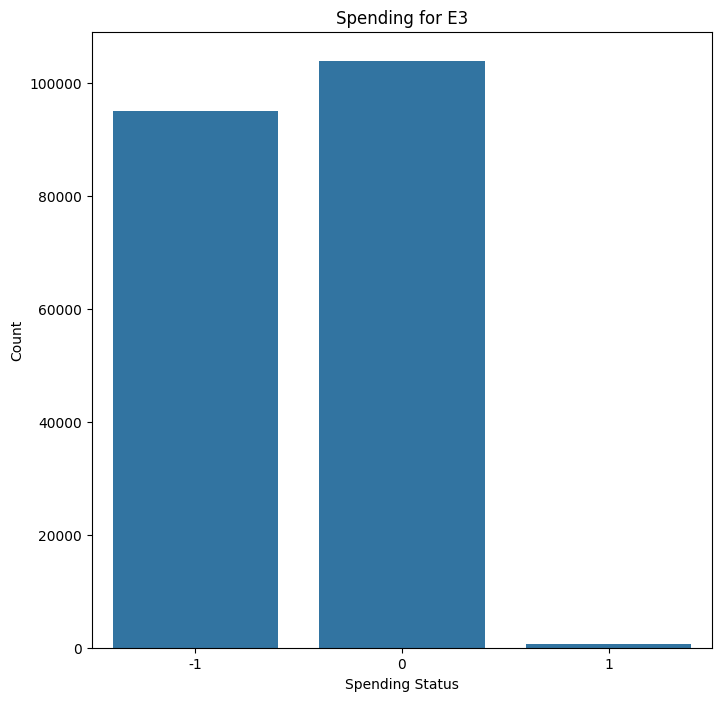

Mean : 145400949.7025689, Median : 0.0, MAX : 1957600000000.0
Corresponding Country is : USA


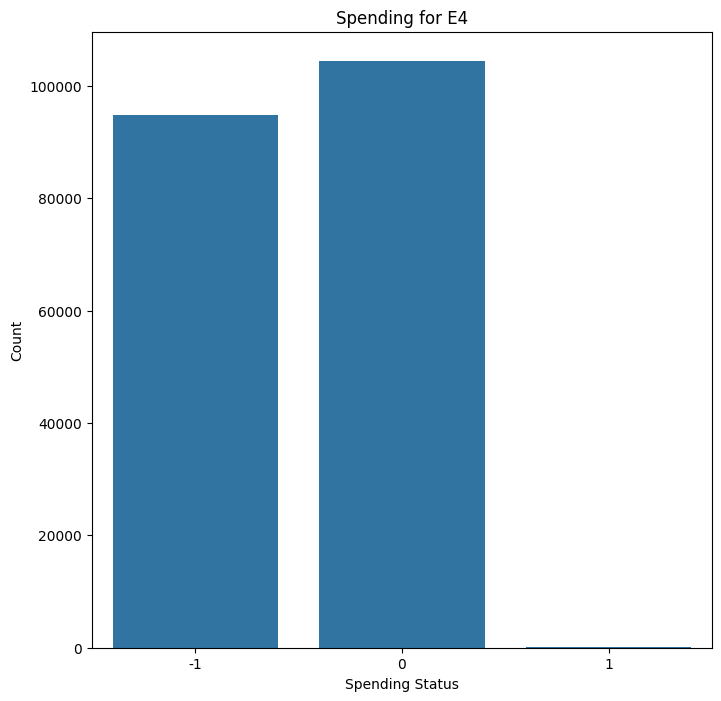

Mean : 8632440.900121702, Median : 0.0, MAX : 834353051822.0
Corresponding Country is : JPN


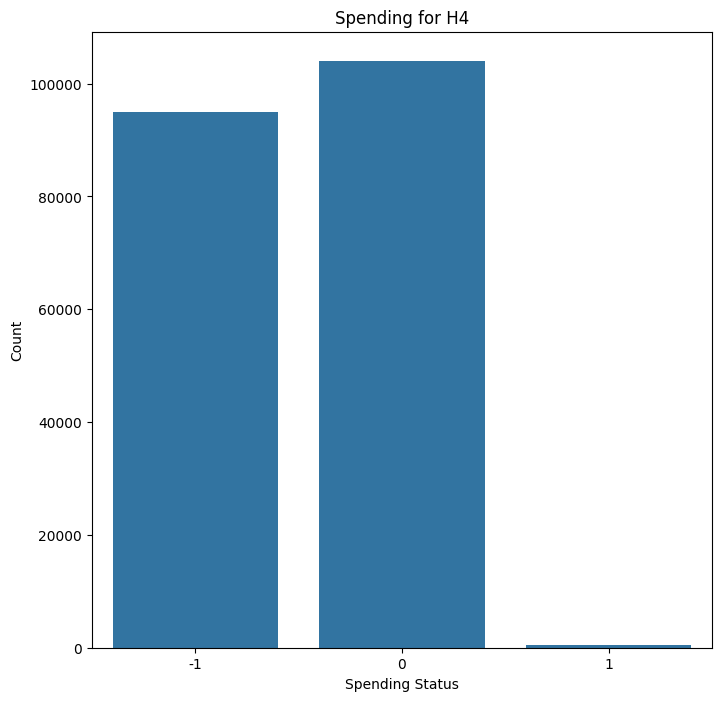

Mean : 8110618.900422691, Median : 0.0, MAX : 242400000000.0
Corresponding Country is : USA


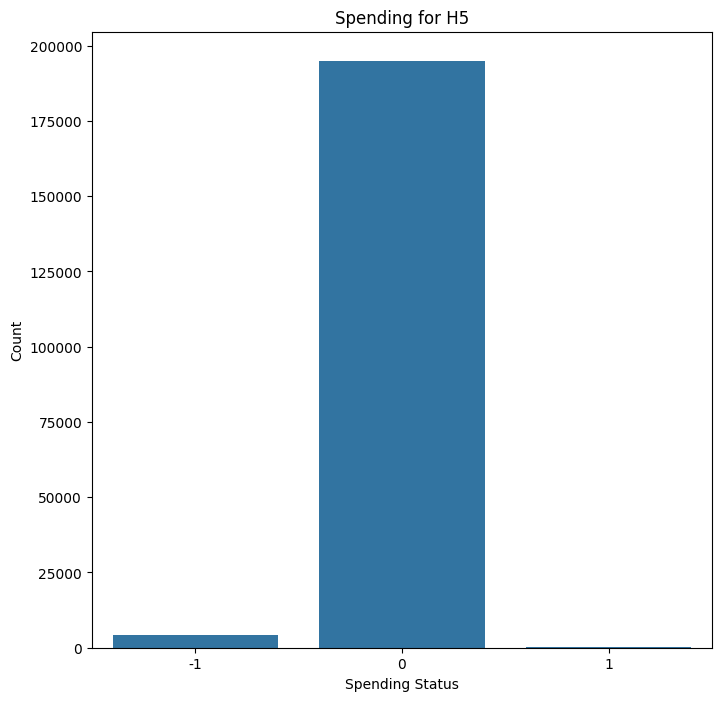

Mean : 417381.1727243759, Median : 0.0, MAX : 15750000000.0
Corresponding Country is : GBR


In [289]:
columns_here = ['E3', 'E4', 'H4', 'H5']
for column in columns_here:
    df[column + '__'] = df[column].apply(lambda x: -1 if pd.isnull(x) else (0 if x == 0 else 1))
    plt.figure(figsize=(8, 8))
    sns.countplot(x=df[column + '__'])
    #plt.legend(labels=['Missing', 'No Spending', 'Spending'], loc='upper right')
    plt.xlabel('Spending Status')
    plt.ylabel('Count')
    plt.title('Spending for ' + column)
    plt.show()
    print(f'Mean : {df[column].mean()}, Median : {df[column].median()}, MAX : {df[column].max()}')
    print(f'Corresponding Country is : {df[df[column] == df[column].max()]["CountryCode"].values[0]}')
    df.drop(column + '__', axis=1, inplace=True)

In [290]:
helper_df.columns

Index(['Column_Name', 'Description', 'Measurement', 'customDescription',
       'Measurement_2'],
      dtype='object')

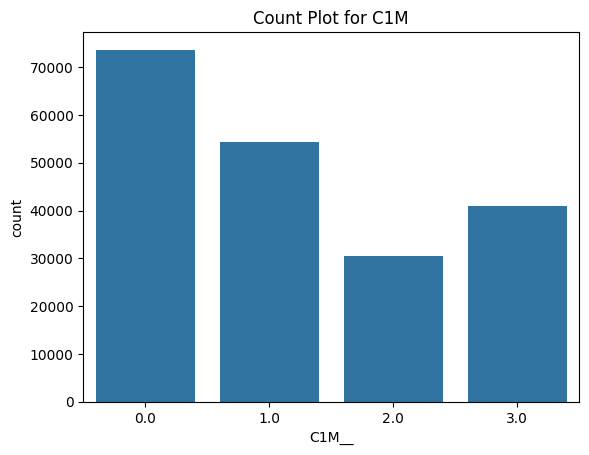

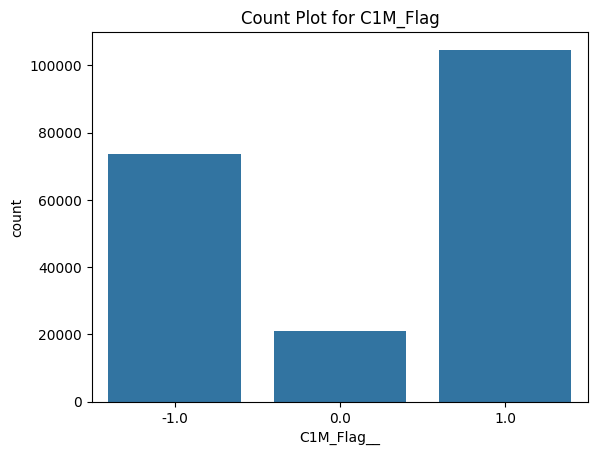

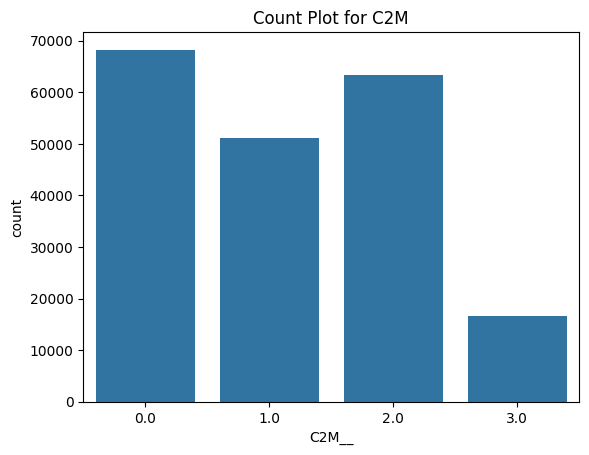

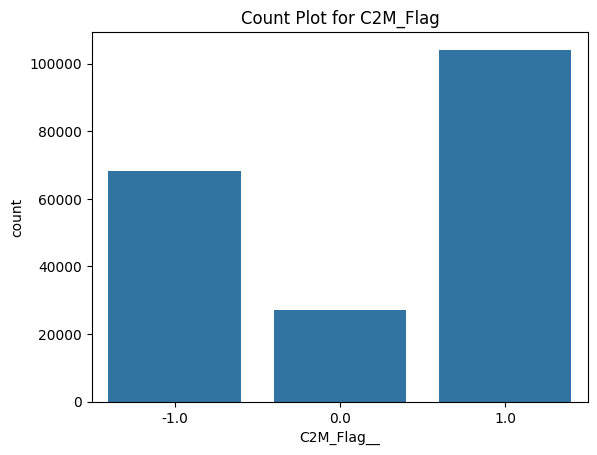

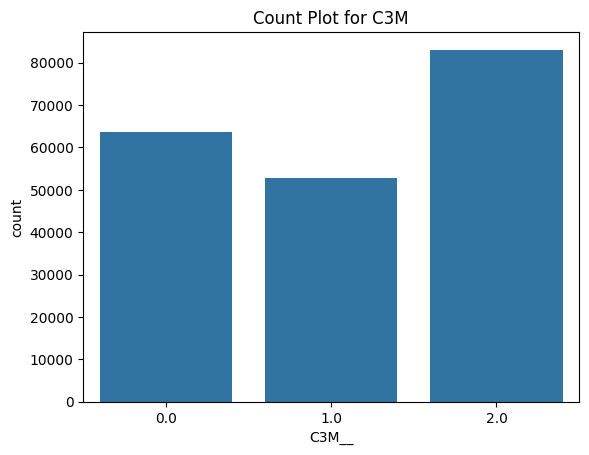

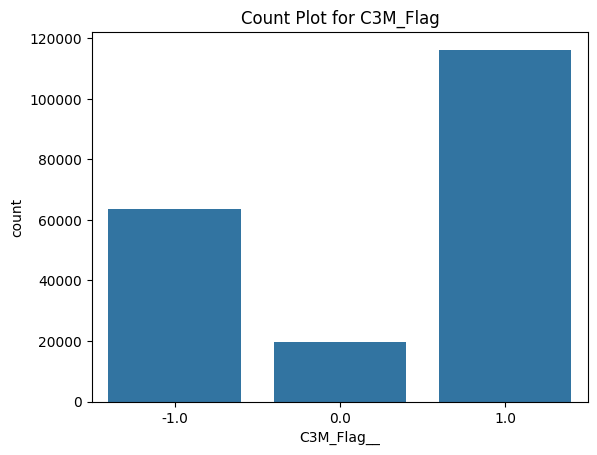

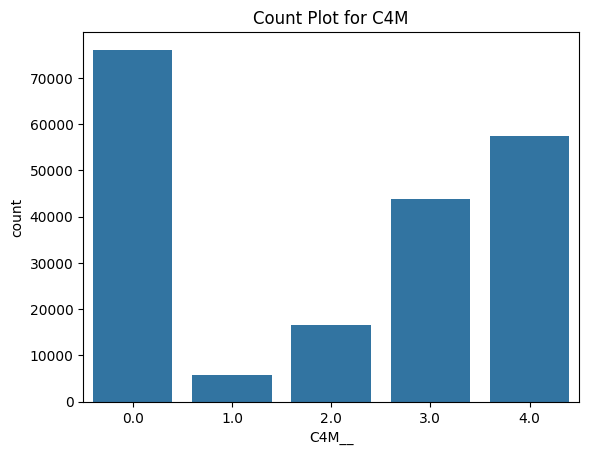

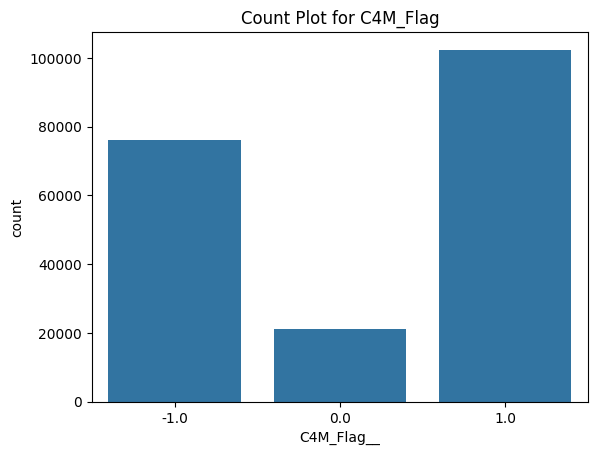

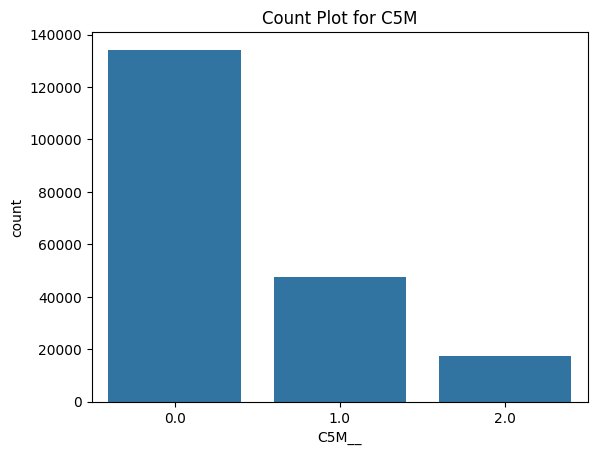

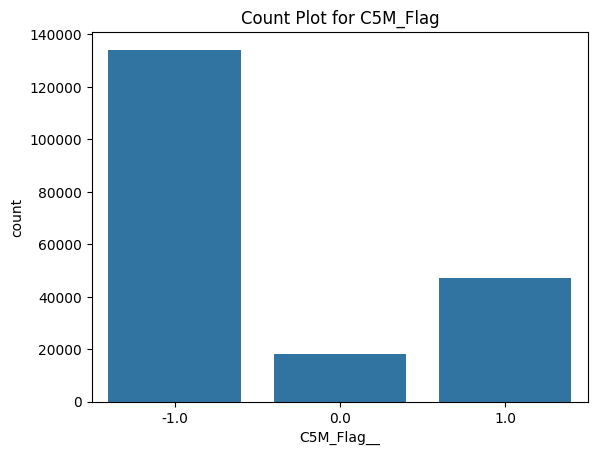

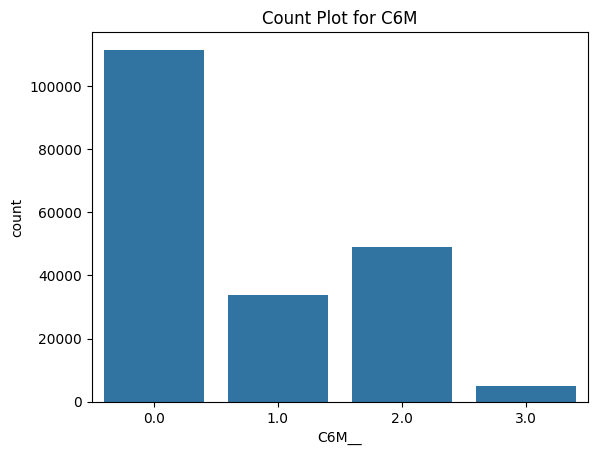

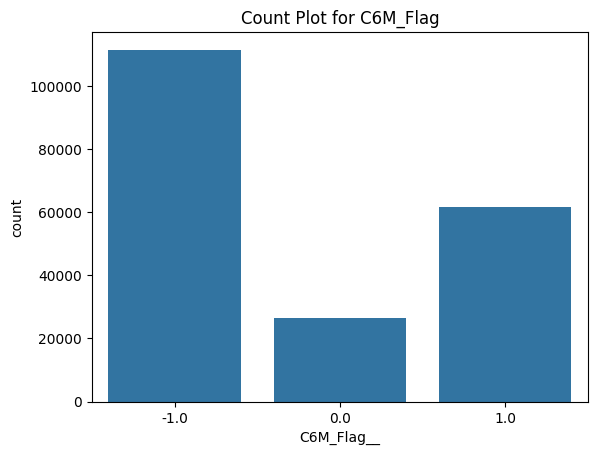

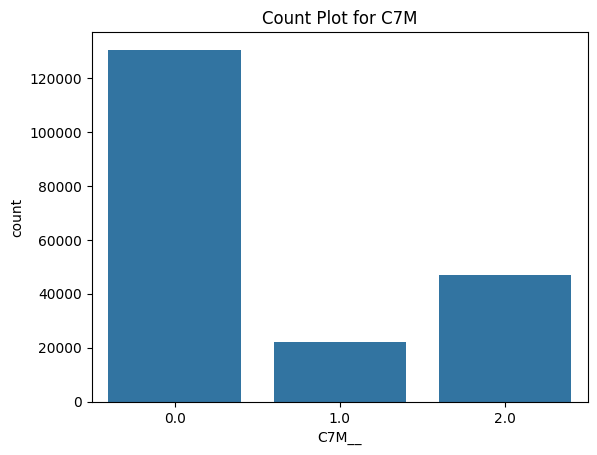

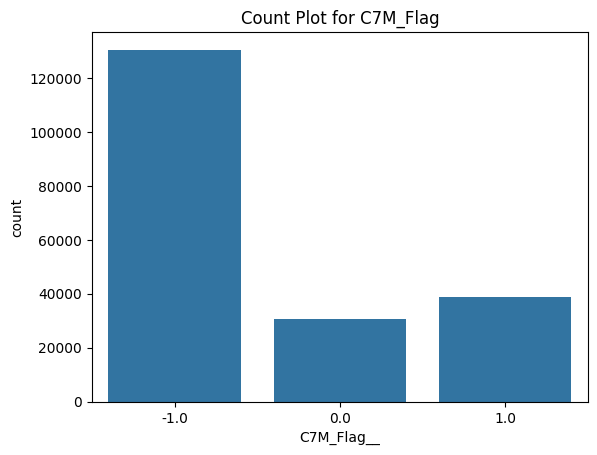

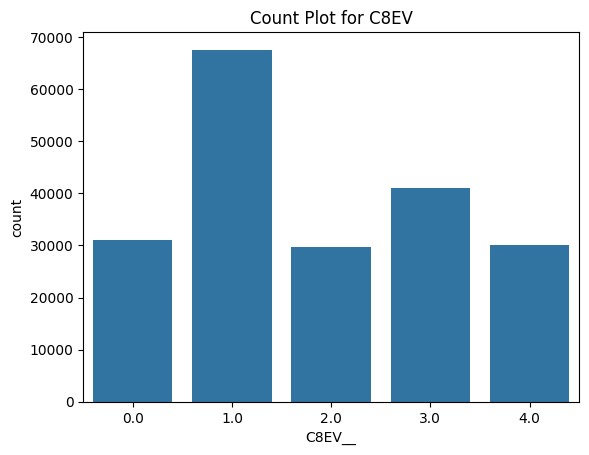

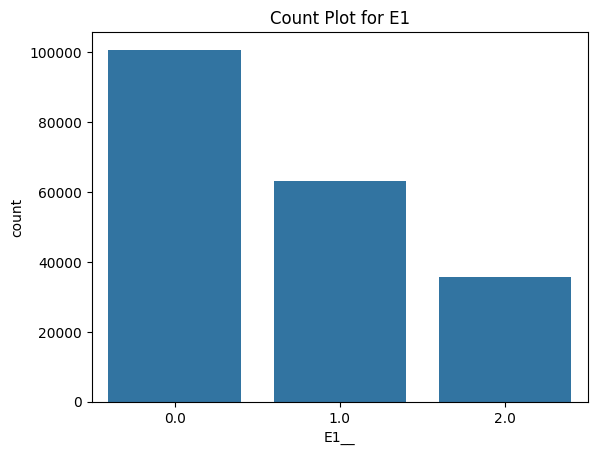

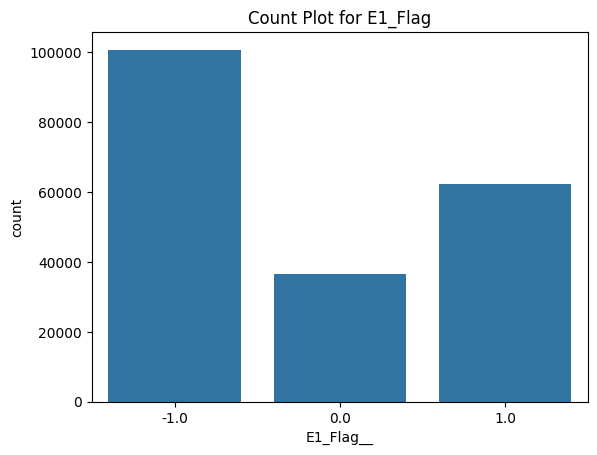

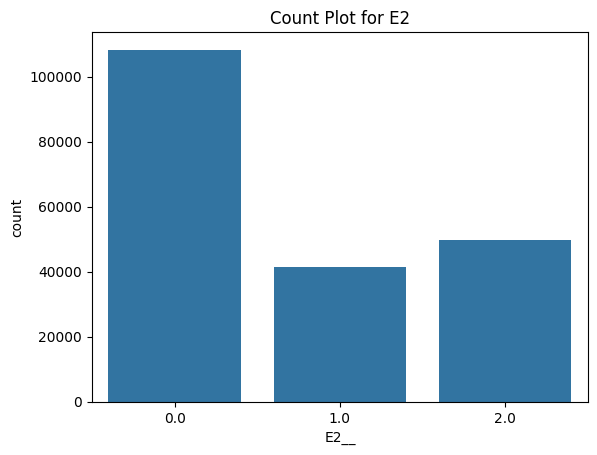

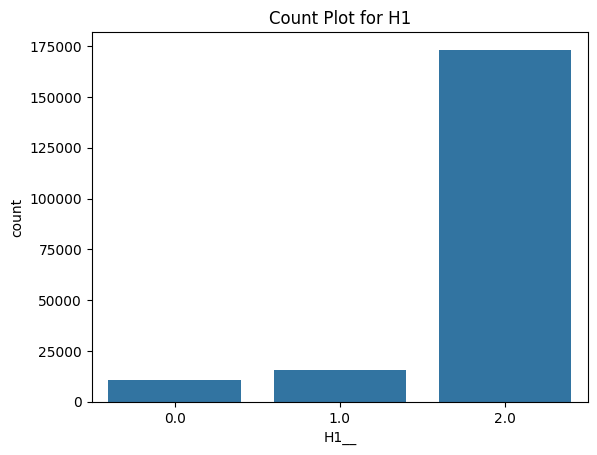

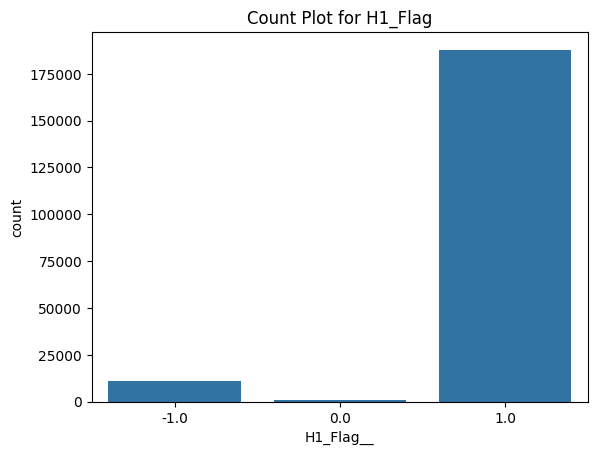

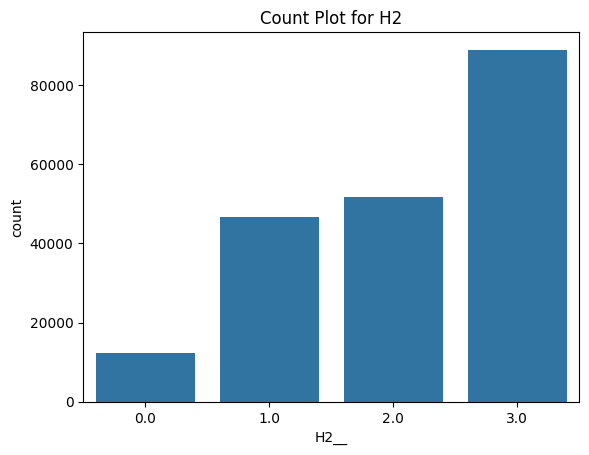

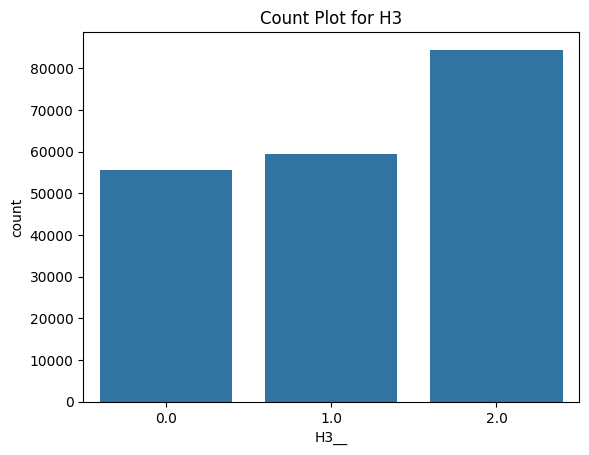

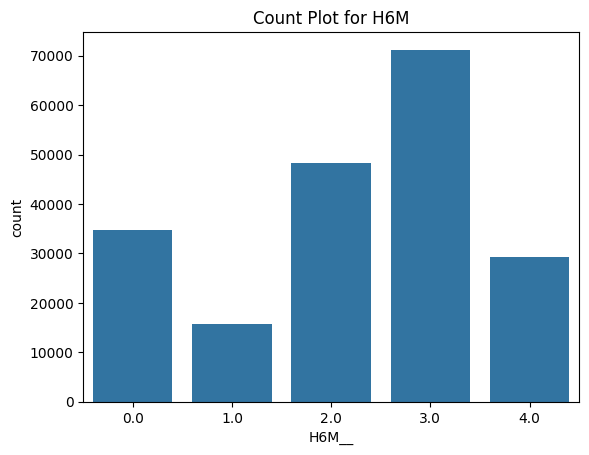

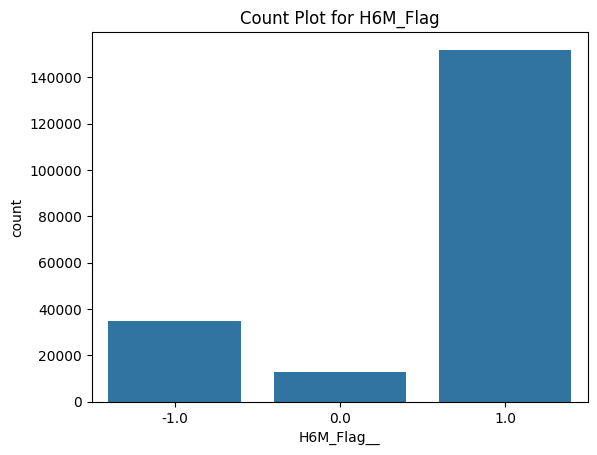

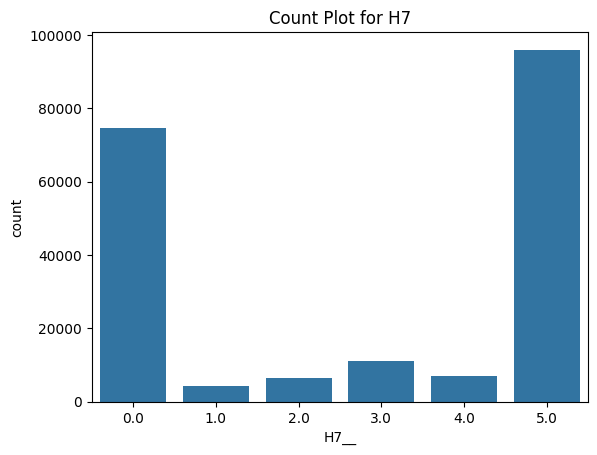

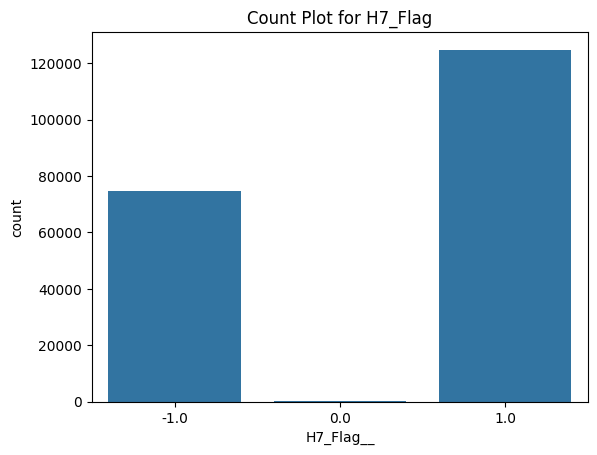

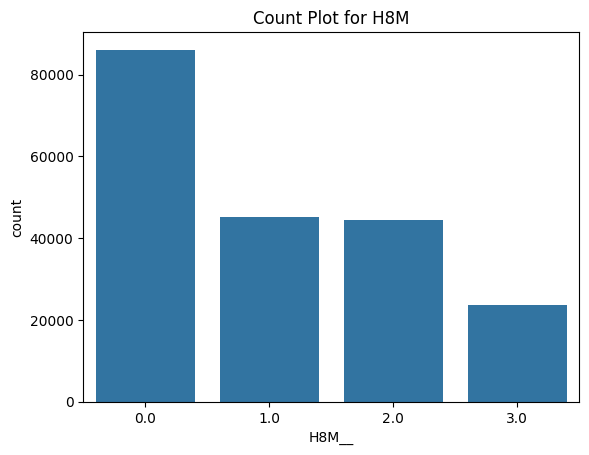

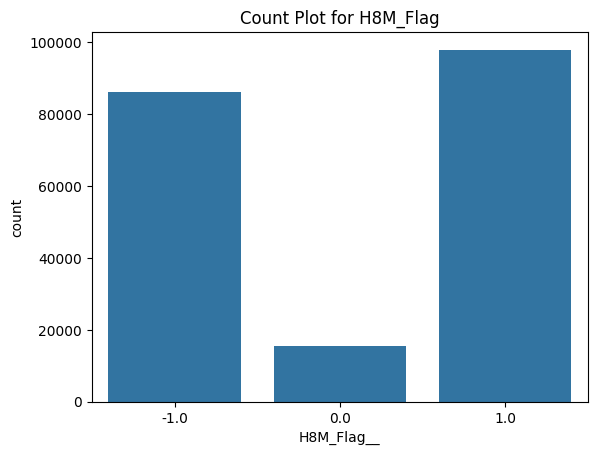

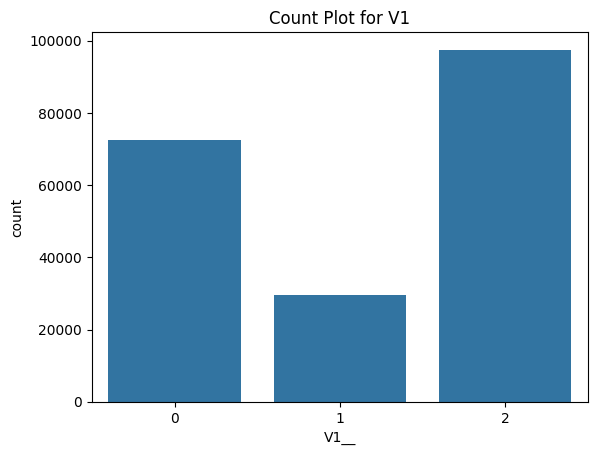

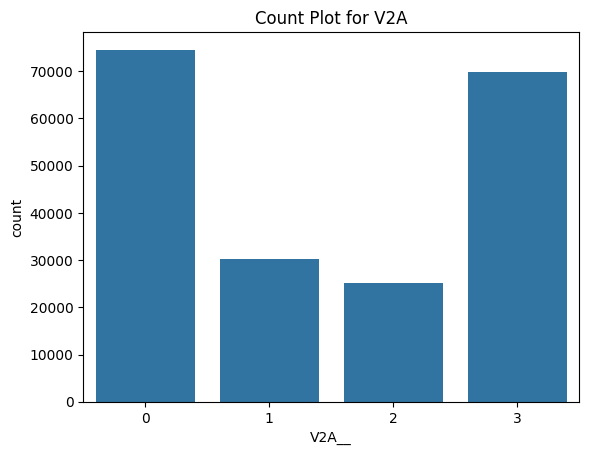

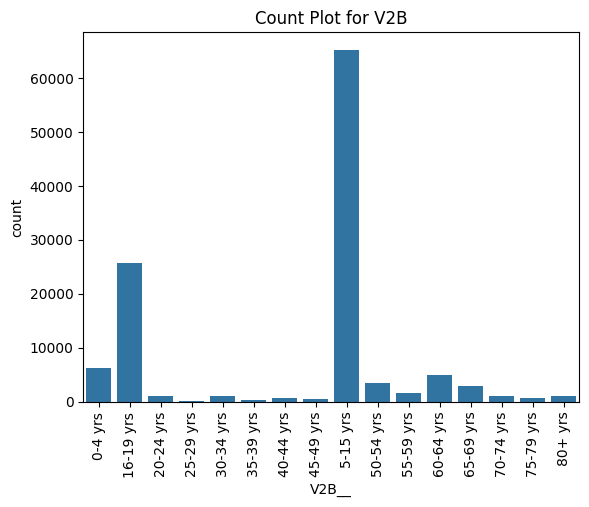

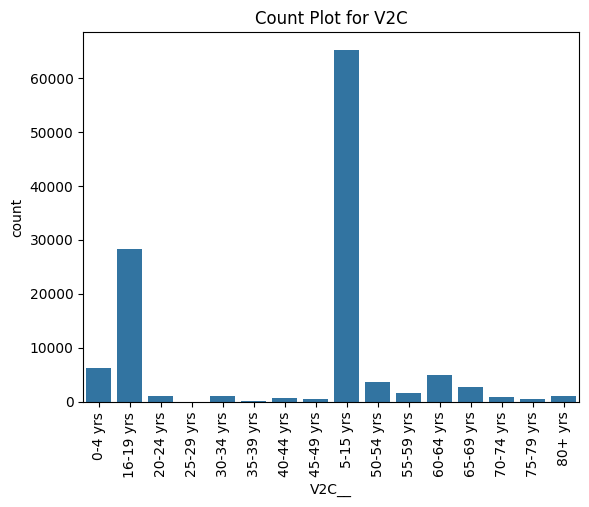

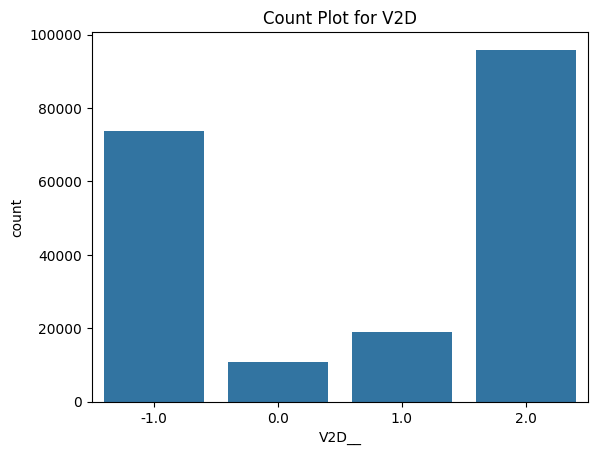

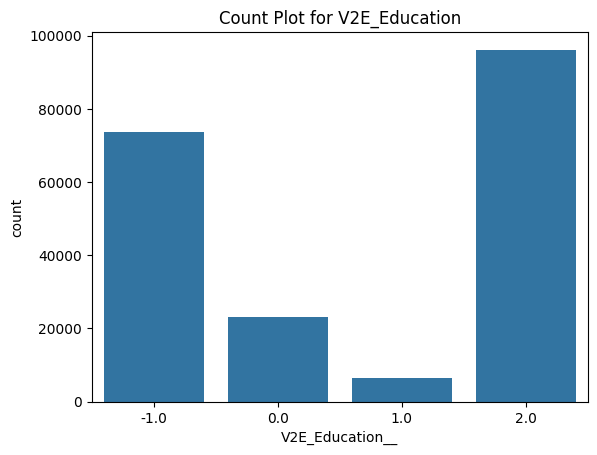

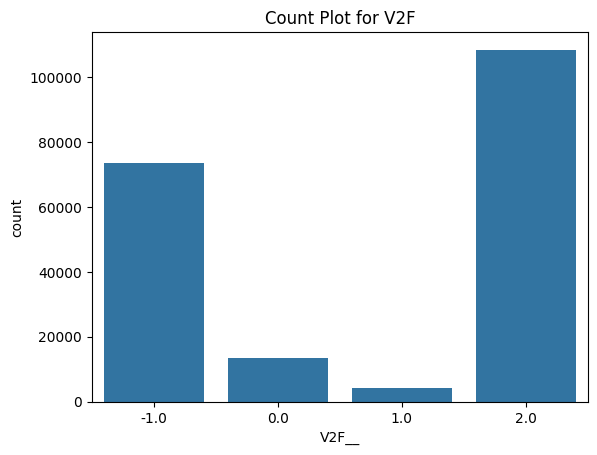

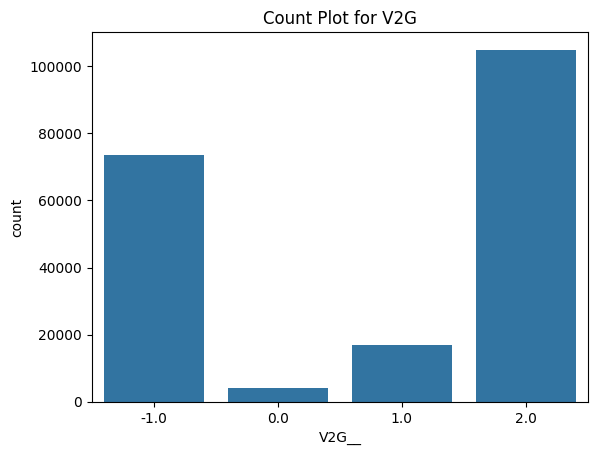

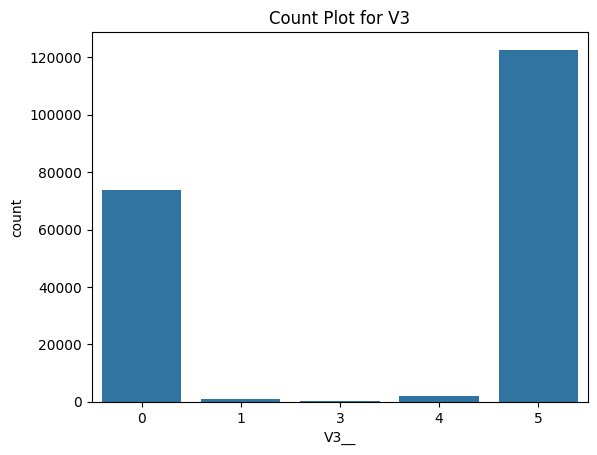

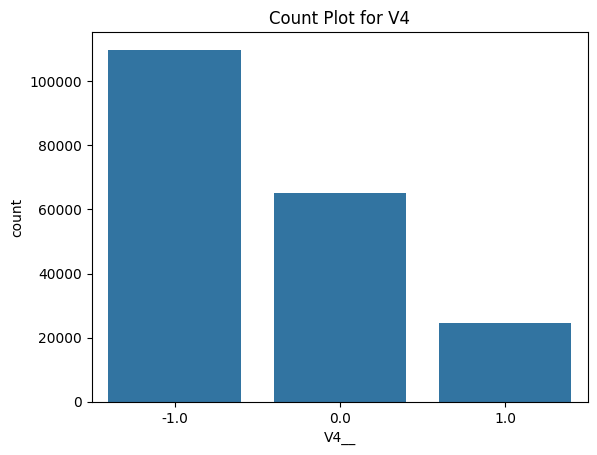

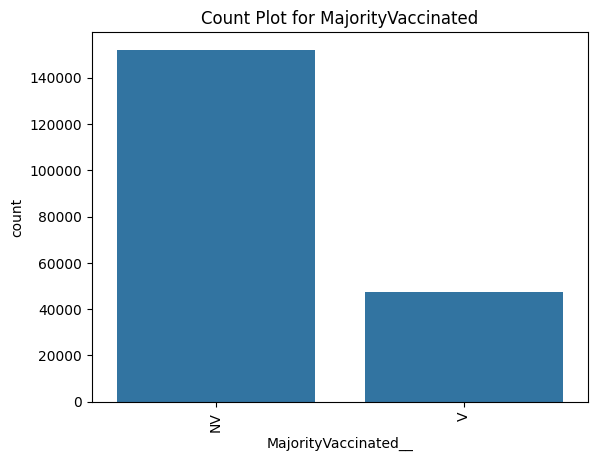

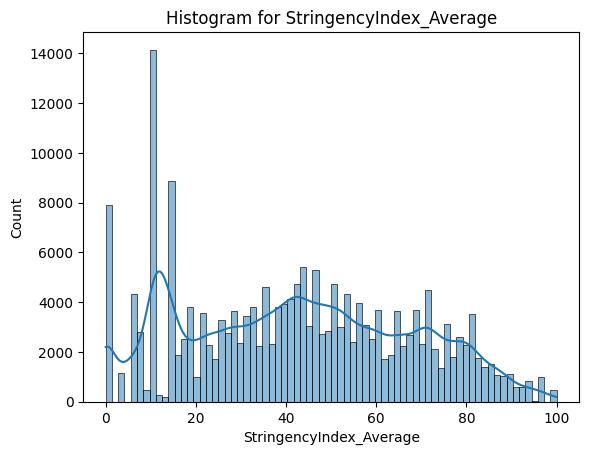

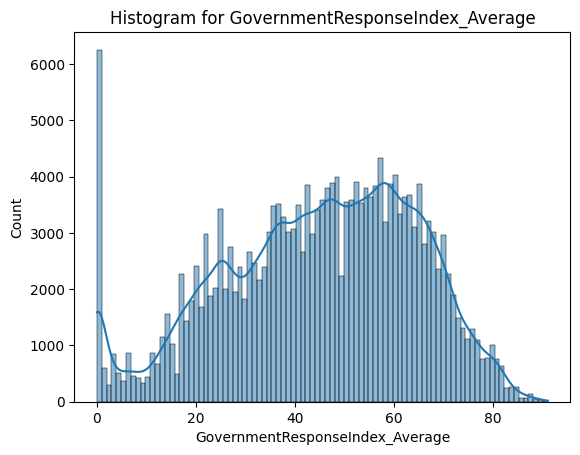

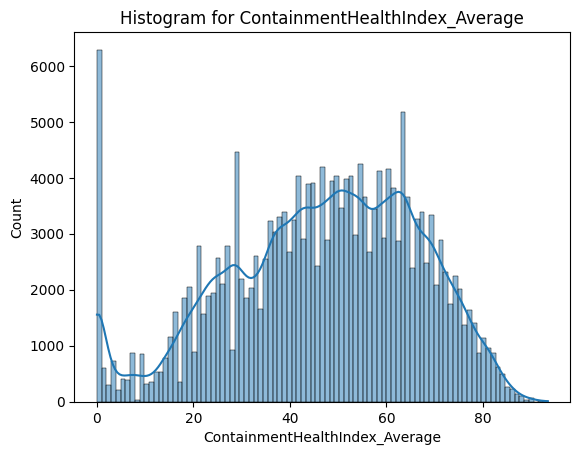

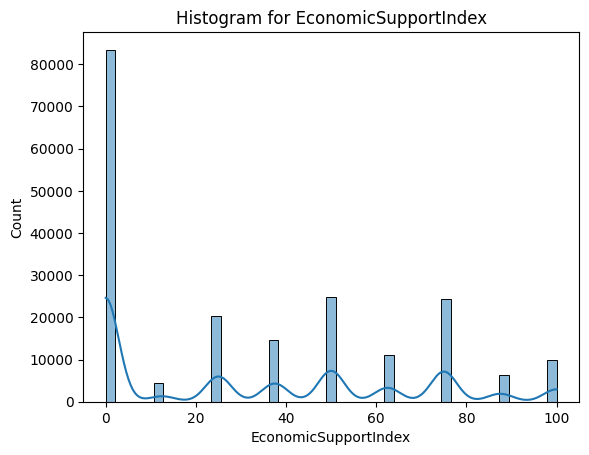

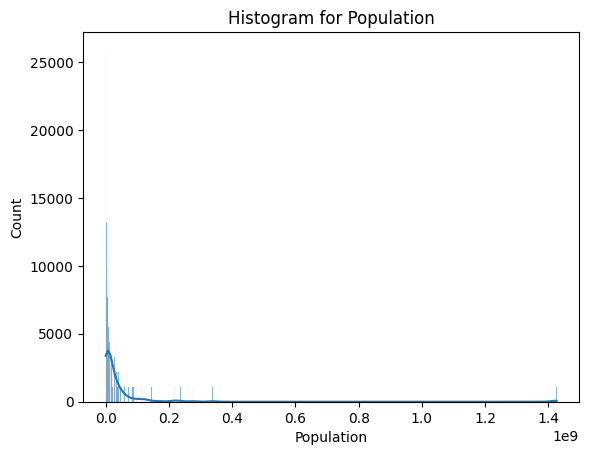

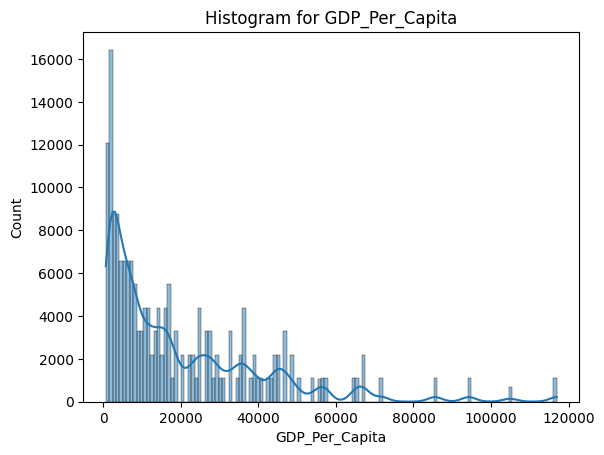

In [291]:
#helper_df = pd.read_csv('/content/drive/MyDrive/CIC/data_description.csv')
def decide_and_plot(df, column, measurement_info):
    if measurement_info in ['BinaryFlag', 'Binary', 'Categorical', 'Ordinal']:
        # Count plot for categorical and binary data
        #df[column + '_temp'] = df[column].apply(lambda x: -1 if pd.isnull(x) else x)
        if measurement_info == 'Categorical':
            df[column+'__'] = df[column].apply(lambda x: 'Missing' if pd.isnull(x) else x)
            sns.countplot(x=df[column+'__'])
            plt.title(f'Count Plot for {column}')
            plt.xticks(rotation=90)
            plt.show()
            df.drop(column+'__', axis=1, inplace=True)
        else: 
            df[column+'__'] = df[column].apply(lambda x: -1 if pd.isnull(x) else x)
            sns.countplot(data=df, x=column + '__')
            plt.title(f'Count Plot for {column}')
            plt.show()
            df.drop(column+'__', axis=1, inplace=True)
        #fig = go.Figure(data=go.Histogram(x=df[column]))
        #fig.update_layout(title_text=f'Count Plot for {column}', xaxis_title=column, yaxis_title='Count')
        #fig.show()
    elif measurement_info in ['USD', 'Number', 'Numeric', 'Numerical']:
        # Histogram for numerical data
        df[column+'__'] = df[column].apply(lambda x: -99 if pd.isnull(x) else x)
        sns.histplot(data=df, x=column, kde=True)
        plt.title(f'Histogram for {column}')
        plt.show()
        df.drop(column+'__', axis=1, inplace=True)

exclude_columns = ['Date', 'CountryName', 'ConfirmedCases', 'ConfirmedDeaths', 'PopulationVaccinated', 'E3', 'E4', 'H4', 'H5']
columns_to_plot = [col for col in df.columns if col not in exclude_columns]


for column in columns_to_plot:
    measurement_type = helper_df[helper_df['Column_Name'] == column]['Measurement_2'].values
    if measurement_type.size > 0:
        decide_and_plot(df, column, measurement_type[0])

#### Considering nationwide policies only

In [130]:
'''
# columns that end with 'Flag' but are not 'E1_Flag' or 'H7_Flag'
flag_columns = [col for col in df.columns if col.endswith('Flag') and col not in ['E1_Flag', 'H7_Flag']]

# flag columns have a value of 1,
df = df[(df[flag_columns] == 1).any(axis=1)]

df = df.drop(columns=flag_columns)

df.shape
'''

"\n# columns that end with 'Flag' but are not 'E1_Flag' or 'H7_Flag'\nflag_columns = [col for col in df.columns if col.endswith('Flag') and col not in ['E1_Flag', 'H7_Flag']]\n\n# flag columns have a value of 1,\ndf = df[(df[flag_columns] == 1).any(axis=1)]\n\ndf = df.drop(columns=flag_columns)\n\ndf.shape\n"

In [292]:
df.describe()

Date            C1M       C1M_Flag  \
count                         199472  199472.000000  125818.000000   
mean   2021-07-01 11:59:59.999999744       1.194689       0.832123   
min              2020-01-01 00:00:00       0.000000       0.000000   
25%              2020-09-30 18:00:00       0.000000       1.000000   
50%              2021-07-01 12:00:00       1.000000       1.000000   
75%              2022-04-01 06:00:00       2.000000       1.000000   
max              2022-12-31 00:00:00       3.000000       1.000000   
std                              NaN       1.142784       0.373759   

                 C2M       C2M_Flag            C3M       C3M_Flag  \
count  199472.000000  131219.000000  199472.000000  135831.000000   
mean        1.142436       0.793780       1.097432       0.856005   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       0.000000       1.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%         2.000000       1.000000       2.000000       1.000000   
max         3.000000       1.000000       2.000000       1.000000   
std         0.986610       0.404592       0.852078       0.351086   

                 C4M       C4M_Flag            C5M      C5M_Flag  \
count  199472.000000  123391.000000  199472.000000  65251.000000   
mean        2.004251       0.829728       0.415196      0.724157   
min         0.000000       0.000000       0.000000      0.000000   
25%         0.000000       1.000000       0.000000      0.000000   
50%         3.000000       1.000000       0.000000      1.000000   
75%         4.000000       1.000000       1.000000      1.000000   
max         4.000000       1.000000       2.000000      1.000000   
std         1.710500       0.375873       0.647275      0.446941   

                 C6M      C6M_Flag            C7M      C7M_Flag  \
count  199472.000000  88017.000000  199472.000000  69025.000000   
mean        0.737687      0.699990       0.580688      0.558913   
min         0.000000      0.000000       0.000000      0.000000   
25%         0.000000      0.000000       0.000000      0.000000   
50%         0.000000      1.000000       0.000000      1.000000   
75%         2.000000      1.000000       1.000000      1.000000   
max         3.000000      1.000000       2.000000      1.000000   
std         0.914668      0.458265       0.844270      0.496521   

                C8EV             E1       E1_Flag             E2  \
count  199472.000000  199472.000000  98749.000000  199472.000000   
mean        1.857754       0.673969      0.629475       0.707277   
min         0.000000       0.000000      0.000000       0.000000   
25%         1.000000       0.000000      0.000000       0.000000   
50%         2.000000       0.000000      1.000000       0.000000   
75%         3.000000       1.000000      1.000000       2.000000   
max         4.000000       2.000000      1.000000       2.000000   
std         1.323042       0.759982      0.482948       0.841006   

                 E3            E4             H1        H1_Flag  \
count  1.045200e+05  1.045990e+05  199472.000000  188732.000000   
mean   1.454009e+08  8.632441e+06       1.814746       0.995788   
min   -1.000000e-02 -2.000000e-02       0.000000       0.000000   
25%    0.000000e+00  0.000000e+00       2.000000       1.000000   
50%    0.000000e+00  0.000000e+00       2.000000       1.000000   
75%    0.000000e+00  0.000000e+00       2.000000       1.000000   
max    1.957600e+12  8.343531e+11       2.000000       1.000000   
std    1.122761e+10  2.582259e+09       0.508548       0.064766   

                  H2             H3            H4            H5  \
count  199472.000000  199472.000000  1.044730e+05  1.951970e+05   
mean        2.089797       1.144958  8.110619e+06  4.173812e+05   
min         0.000000       0.000000 -1.000000e-02 -7.000000e-02   
25%         1.000000       0.000000  0.000000e+00  0.000000e+00   
50%       

### Imputation Strategy

Filling NaNs with mean, median or mode values at National Level. If that fails, a fallback is added to impute a global statistic.

May use it later.
Dropping it

In [132]:
'''
missing_values_count = df.isna().sum()
missing_values_count = missing_values_count[missing_values_count > 0]

column_data_types = df.dtypes

# use mean, median, or mode for imputation, based on the data type
imputation_strategy = {}
for column in missing_values_count.index:
    if column_data_types[column] in ['float64', 'int64']:
        imputation_strategy[column] = 'median'
    else:
        imputation_strategy[column] = 'mode'

# imputation with a fallback
def impute_with_fallback(series, strategy):
    if strategy == 'median':
        global_fallback = series.median()
        return series.fillna(series.groupby(df['CountryName']).transform('median').fillna(global_fallback))
    elif strategy == 'mode':
        global_fallback = series.mode().iloc[0] if not series.mode().empty else None
        return series.fillna(series.groupby(df['CountryName']).transform(lambda x: x.mode()[0] if not x.mode().empty else global_fallback))

for column, strategy in imputation_strategy.items():
    if strategy == 'median':
        df[column] = impute_with_fallback(df[column], strategy)
    elif strategy == 'mode':
        df[column] = df[column].astype('str')
        df[column] = impute_with_fallback(df[column], strategy)
        df[column] = df[column].replace('nan', np.nan)


df.isna().sum()

#still need to do it for V2B and V2C
missing_values_after_imputation = df.isna().sum()
missing_values_after_imputation = missing_values_after_imputation[missing_values_after_imputation > 0]
for column in missing_values_after_imputation.index:
    column_mode = df[column].mode()
    mode_value = column_mode.iloc[0] if not column_mode.empty else np.nan
    df[column] = df[column].fillna(mode_value)

df.isna().sum()
'''

"\nmissing_values_count = df.isna().sum()\nmissing_values_count = missing_values_count[missing_values_count > 0]\n\ncolumn_data_types = df.dtypes\n\n# use mean, median, or mode for imputation, based on the data type\nimputation_strategy = {}\nfor column in missing_values_count.index:\n    if column_data_types[column] in ['float64', 'int64']:\n        imputation_strategy[column] = 'median'\n    else:\n        imputation_strategy[column] = 'mode'\n\n# imputation with a fallback\ndef impute_with_fallback(series, strategy):\n    if strategy == 'median':\n        global_fallback = series.median()\n        return series.fillna(series.groupby(df['CountryName']).transform('median').fillna(global_fallback))\n    elif strategy == 'mode':\n        global_fallback = series.mode().iloc[0] if not series.mode().empty else None\n        return series.fillna(series.groupby(df['CountryName']).transform(lambda x: x.mode()[0] if not x.mode().empty else global_fallback))\n\nfor column, strategy in imputati

#### Fill NaNs with 0.

In [133]:
'''
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df.loc[:, col] = df[col].fillna(0)
    elif pd.api.types.is_categorical_dtype(df[col]):
        if '0' not in df[col].cat.categories:
            df[col] = df[col].cat.add_categories('0')
        df.loc[:, col] = df[col].fillna('0')
'''        

"\nfor col in df.columns:\n    if pd.api.types.is_numeric_dtype(df[col]):\n        df.loc[:, col] = df[col].fillna(0)\n    elif pd.api.types.is_categorical_dtype(df[col]):\n        if '0' not in df[col].cat.categories:\n            df[col] = df[col].cat.add_categories('0')\n        df.loc[:, col] = df[col].fillna('0')\n"

### Correlation Matrix

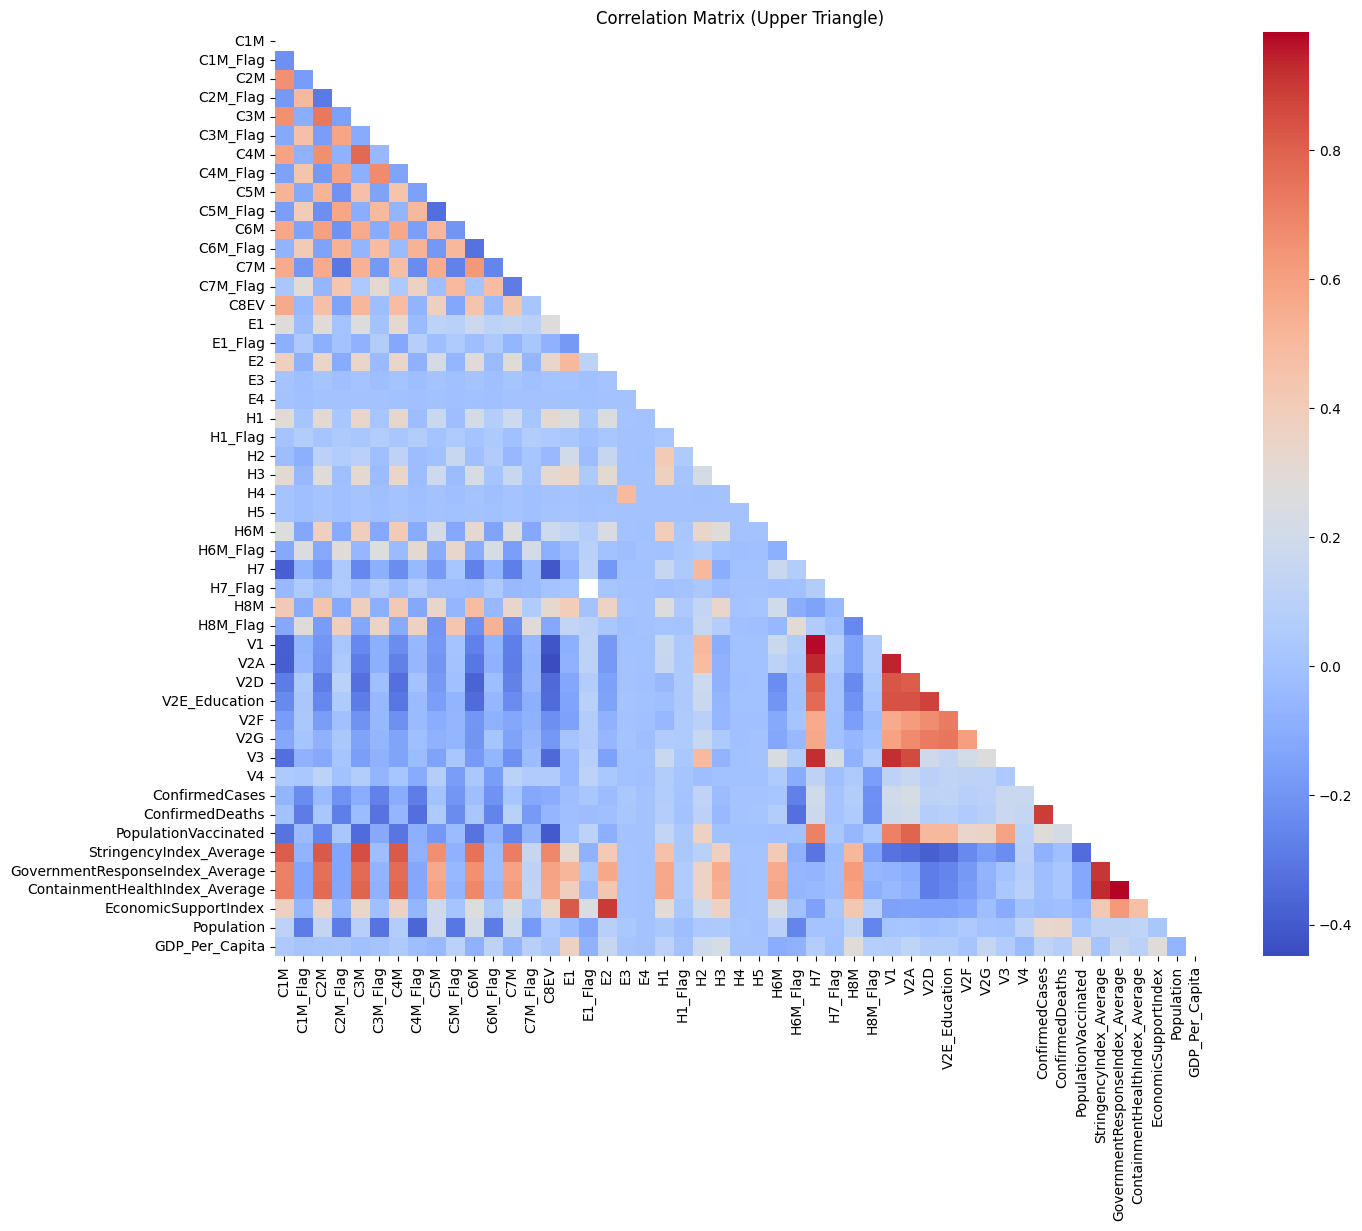

Columns: C3M_Flag and C5M_Flag, Correlation Coefficient: 0.49
Columns: H8M and StringencyIndex_Average, Correlation Coefficient: 0.51
Columns: C5M and ContainmentHealthIndex_Average, Correlation Coefficient: 0.59
Columns: C1M and GovernmentResponseIndex_Average, Correlation Coefficient: 0.71
Columns: V2A and V2G, Correlation Coefficient: 0.67
Columns: EconomicSupportIndex and GovernmentResponseIndex_Average, Correlation Coefficient: 0.62
Columns: E3 and H4, Correlation Coefficient: 0.49
Columns: PopulationVaccinated and V2E_Education, Correlation Coefficient: 0.50
Columns: C3M and C7M, Correlation Coefficient: 0.53
Columns: C1M and StringencyIndex_Average, Correlation Coefficient: 0.81
Columns: GovernmentResponseIndex_Average and H6M, Correlation Coefficient: 0.56
Columns: C2M and C6M, Correlation Coefficient: 0.60
Columns: ContainmentHealthIndex_Average and E2, Correlation Coefficient: 0.44
Columns: C1M and C3M, Correlation Coefficient: 0.66
Columns: PopulationVaccinated and V1, Corre

142

In [293]:
corr_matrix = df.corr(numeric_only=True)

# Mask to display only one half
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=False) # since we've too many variables here. However, we shall display pairs having a correlation coefficient more or less than a certain threshold.
plt.title('Correlation Matrix (Upper Triangle)')
plt.show()

# pairs of columns with a correlation coefficient >= 0.4 or <= -0.4
high_correlation_pairs = []

for row in corr_matrix.columns:
    for col in corr_matrix.columns:
        if row != col:
            if corr_matrix.loc[row, col] >= 0.4 or corr_matrix.loc[row, col] <= -0.4:
                high_correlation_pairs.append((row, col, corr_matrix.loc[row, col]))

unique_pairs = set()
for pair in high_correlation_pairs:
    sorted_pair = tuple(sorted([pair[0], pair[1]])) + (pair[2],)
    unique_pairs.add(sorted_pair)

for pair in unique_pairs:
    print(f"Columns: {pair[0]} and {pair[1]}, Correlation Coefficient: {pair[2]:.2f}")

len(unique_pairs)

In [294]:
aggregation_funcs = {}
for column in df.columns:
    if pd.api.types.is_categorical_dtype(df[column]):
      aggregation_funcs[column] = 'count'
    elif pd.api.types.is_datetime64_dtype(df[column]):
      continue
    else:
      aggregation_funcs[column] = 'sum'

### TSA

#### Confirmed Cases

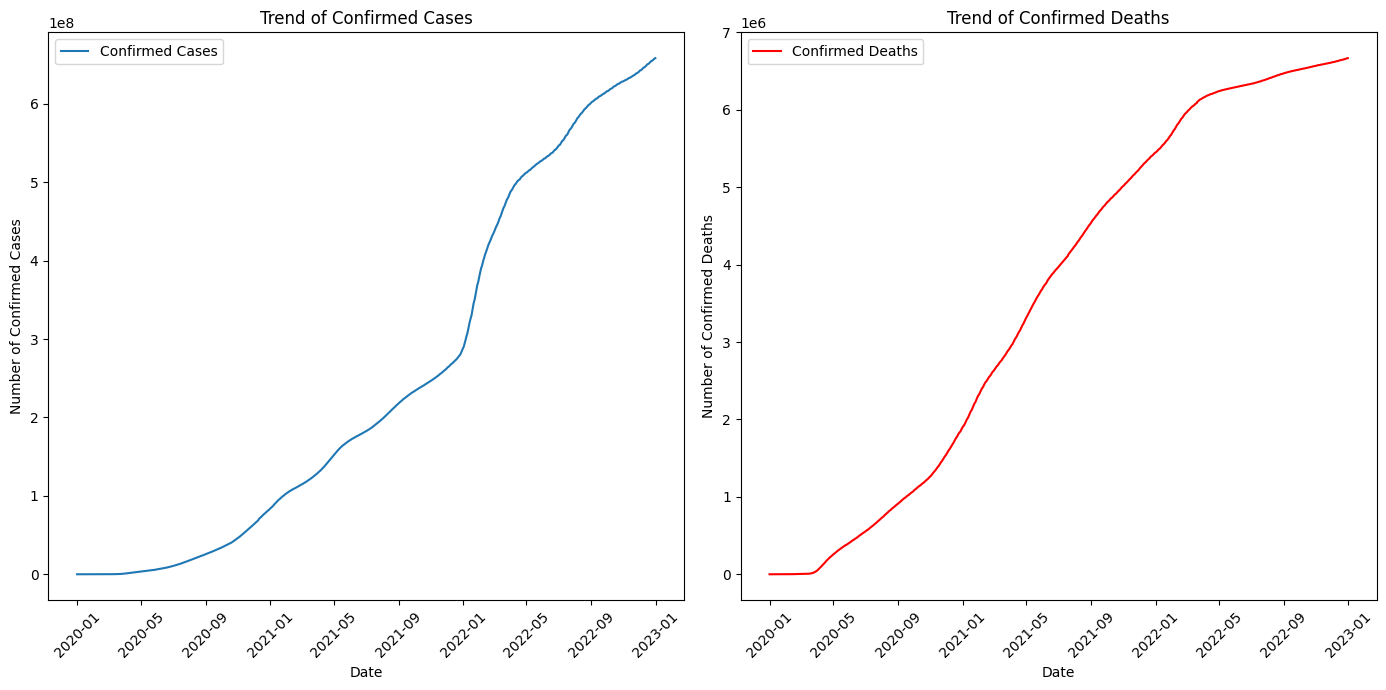

In [295]:
# Aggregating data by date
df_agg_date = df.groupby('Date').agg(aggregation_funcs)

# Plotting ConfirmedCases and ConfirmedDeaths
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(df_agg_date.index, df_agg_date['ConfirmedCases'], label='Confirmed Cases')
plt.title('Trend of Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df_agg_date.index, df_agg_date['ConfirmedDeaths'], label='Confirmed Deaths', color='red')
plt.title('Trend of Confirmed Deaths')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Deaths')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


In [296]:
print('The total number of covid-19 cases in our dataset are {}'.format(df_agg_date['ConfirmedCases'].iloc[-1]))

The total number of covid-19 cases in our dataset are 658353316.0


In [297]:
df_agg_date.describe()

CountryCode          C1M     C1M_Flag          C2M     C2M_Flag  \
count       1096.0  1096.000000  1096.000000  1096.000000  1096.000000   
mean         182.0   217.433394    95.525547   207.923358    95.035584   
std            0.0   139.669712    47.656872   103.029302    37.543492   
min          182.0     0.000000     0.000000     0.000000     0.000000   
25%          182.0    66.000000    43.000000   100.500000    63.000000   
50%          182.0   219.000000   107.000000   245.000000   113.000000   
75%          182.0   308.000000   130.000000   282.000000   119.000000   
max          182.0   528.000000   173.000000   428.000000   146.000000   

               C3M     C3M_Flag          C4M     C4M_Flag          C5M  \
count  1096.000000  1096.000000  1096.000000  1096.000000  1096.000000   
mean    199.732664   106.087591   364.773723    93.413321    75.565693   
std      98.694310    47.666704   205.668359    48.836375    49.060668   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      97.000000    61.750000   132.000000    41.000000    24.750000   
50%     242.000000   129.000000   479.000000   116.000000    88.500000   
75%     272.000000   139.000000   540.000000   130.000000   105.000000   
max     351.000000   171.000000   599.000000   158.000000   212.000000   

          C5M_Flag          C6M     C6M_Flag          C7M     C7M_Flag  \
count  1096.000000  1096.000000  1096.000000  1096.000000  1096.000000   
mean     43.113139   134.259124    56.214416   105.685219    35.199818   
std      26.654049    90.766117    39.627588    72.574411    27.206117   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      15.000000    27.000000     9.000000    26.000000     6.000000   
50%      47.000000   174.000000    65.000000   124.000000    39.000000   
75%      62.000000   204.250000    87.000000   154.000000    50.000000   
max     110.000000   323.000000   136.000000   294.000000   120.000000   

              C8EV           E1      E1_Flag           E2            E3  \
count  1096.000000  1096.000000  1096.000000  1096.000000  1.096000e+03   
mean    338.111314   122.662409    56.715328   128.724453  1.386616e+10   
std     174.789602    54.187541    21.280196    65.283399  1.176814e+11   
min       2.000000     0.000000     0.000000     0.000000 -1.000000e-02   
25%     172.500000    79.000000    39.000000    63.000000  0.000000e+00   
50%     359.000000   130.500000    66.000000   135.000000  0.000000e+00   
75%     455.250000   168.000000    72.000000   182.250000  0.000000e+00   
max     659.000000   191.000000    82.000000   222.000000  2.387742e+12   

                 E4           H1      H1_Flag           H2           H3  \
count  1.096000e+03  1096.000000  1096.000000  1096.000000  1096.000000   
mean   8.238546e+08   330.283759   171.475365   380.343066   208.382299   
std    2.523746e+10    63.068787    30.815600   107.324162    64.891936   
min   -2.000000e-02     5.000000     3.000000     1.000000     5.000000   
25%    0.000000e+00   336.750000   178.000000   342.000000   167.000000   
50%    0.000000e+00   349.000000   180.000000   429.000000   231.000000   
75%    0.000000e+00   355.000000   181.000000   455.000000   257.000000   
max    8.347756e+11   360.000000   182.000000   471.000000   282.000000   

                 H4            H5          H6M     H6M_Flag           H7  \
count  1.096000e+03  1.096000e+03  1096.000000  1096.000000  1096.000000   
mean   7.731211e+08  7.433536e+07   404.607664   138.657847   509.430657   
std    9.223503e+09  7.148161e+08   148.539395    44.274906   404.942477   
min   -1.000000e-02 -7.000000e-02     1.000000     0.000000     0.000000   
25%    0.000000e+00  0.000000e+00   343.000000   138.000000     0.000000   
50%    0.000000e+00  0.000000e+00   477.000000   152.500000   728.000000   
75%    0.000000e+00  0.000000e+00   514.000000   165.000000   897.000000   
max    2.461622e+11  1.575000e+10   540.000000

In [298]:
#df_agg_date.tail()
df_monthly = df_agg_date.resample('M').mean()
df_monthly.head(25)
#df_monthly.tail(25)

CountryCode         C1M    C1M_Flag         C2M    C2M_Flag  \
Date                                                                      
2020-01-31        182.0    2.419355    0.838710    1.129032    0.483871   
2020-02-29        182.0   25.724138    6.000000   10.482759    4.034483   
2020-03-31        182.0  297.000000   93.677419  166.709677   67.225806   
2020-04-30        182.0  522.300000  171.133333  413.466667  143.833333   
2020-05-31        182.0  485.709677  162.870968  350.032258  133.064516   
2020-06-30        182.0  420.333333  152.966667  284.366667  115.633333   
2020-07-31        182.0  388.548387  147.064516  263.290323  107.516129   
2020-08-31        182.0  384.903226  146.258065  280.483871  109.774194   
2020-09-30        182.0  343.300000  146.333333  271.500000  114.133333   
2020-10-31        182.0  309.516129  140.000000  257.290323  119.419355   
2020-11-30        182.0  300.300000  142.733333  267.600000  120.466667   
2020-12-31        182.0  312.741935  130.322581  282.354839  116.741935   
2021-01-31        182.0  326.483871  128.645161  291.322581  114.870968   
2021-02-28        182.0  298.785714  122.642857  287.214286  114.607143   
2021-03-31        182.0  284.354839  117.258065  297.354839  113.064516   
2021-04-30        182.0  283.900000  110.766667  304.100000  112.366667   
2021-05-31        182.0  263.032258  104.935484  294.258065  115.258065   
2021-06-30        182.0  261.933333  111.300000  278.200000  119.000000   
2021-07-31        182.0  253.096774  112.709677  265.548387  115.548387   
2021-08-31        182.0  238.903226  110.483871  252.806452  120.612903   
2021-09-30        182.0  215.666667  107.366667  245.566667  112.933333   
2021-10-31        182.0  192.774194  103.225806  228.709677  108.354839   
2021-11-30        182.0  182.033333  106.066667  220.866667  110.366667   
2021-12-31        182.0  183.451613  105.967742  217.161290  123.064516   
2022-01-31        182.0  189.806452  112.193548  231.870968  131.451613   

                   C3M    C3M_Flag         C4M    C4M_Flag         C5M  \
Date                                                                     
2020-01-31    1.967742    0.645161    1.612903    0.161290    0.580645   
2020-02-29   14.965517    6.000000    8.551724    1.620690    2.620690   
2020-03-31  200.967742   95.096774  258.806452   74.419355   66.096774   
2020-04-30  347.333333  169.266667  588.566667  154.333333  205.266667   
2020-05-31  339.516129  165.483871  588.096774  152.935484  172.935484   
2020-06-30  303.200000  153.933333  513.733333  137.966667  141.033333   
2020-07-31  274.774194  143.612903  483.870968  126.161290  122.774194   
2020-08-31  269.483871  138.741935  493.677419  122.967742  113.387097   
2020-09-30  268.066667  137.766667  495.033333  122.933333   97.066667   
2020-10-31  262.709677  138.322581  513.645161  126.387097   86.580645   
2020-11-30  264.966667  141.700000  533.166667  130.333333   83.366667   
2020-12-31  272.258065  140.000000  542.612903  130.709677   92.000000   
2021-01-31  274.870968  135.387097  554.580645  130.548387   95.419355   
2021-02-28  275.750000  133.678571  556.571429  131.357143   99.142857   
2021-03-31  281.967742  136.258065  559.612903  131.903226   99.516129   
2021-04-30  282.333333  138.700000  560.933333  133.300000  110.966667   
2021-05-31  273.612903  136.451613  557.129032  134.548387  111.645161   
2021-06-30  261.266667  141.666667  542.233333  132.733333  102.700000   
2021-07-31  251.451613  130.483871  524.193548  125.645161   93.225806   
2021-08-31  242.096774  130.193548  511.741935  125.387097  104.612903   
2021-09-30  243.800000  126.833333  482.900000  112.033333  105.866667   
2021-10-31  238.032258  128.354839  453.741935  114.612903   95.838710   
2021-11-30  226.833333  126.566667  425.833333  111.566667   77.300000   
2021-12-31  218.774194  127.322581  419.709677  113.870968   67.516129   
2022-01-31  219.290323  130.419355  420.548387  114.000000   6

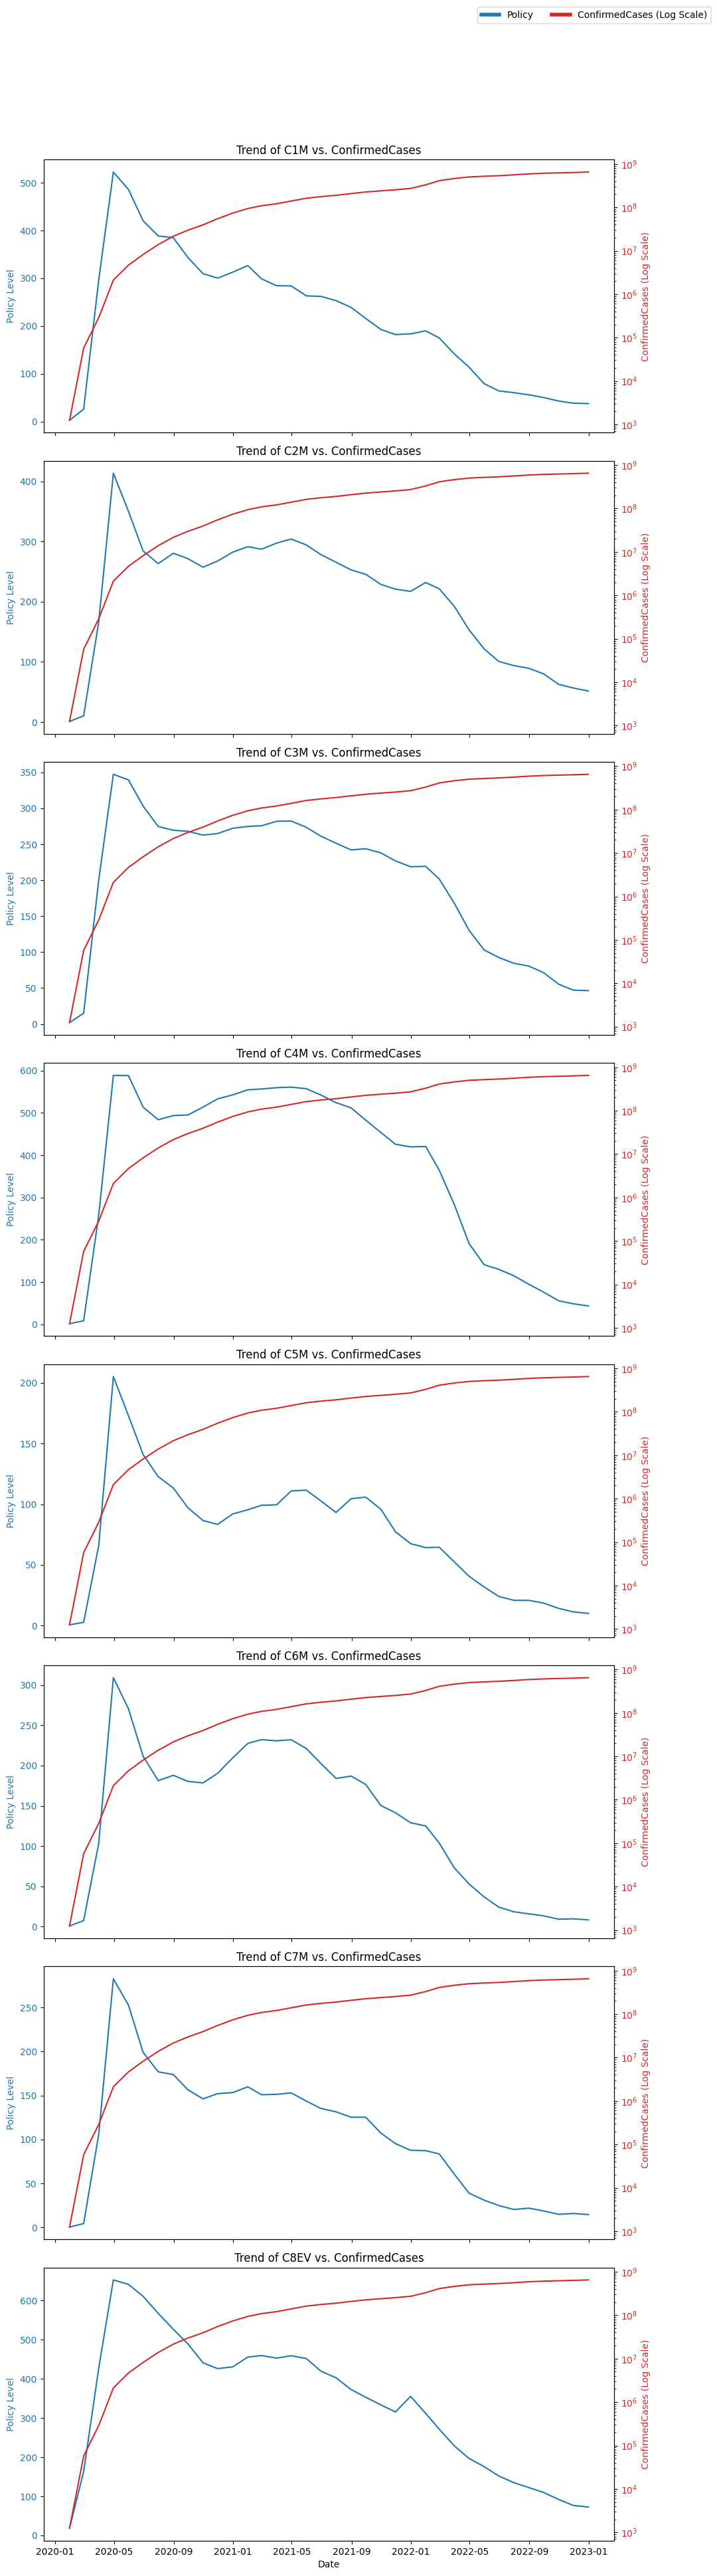

In [299]:
containment_policy_columns = ['C1M', 'C2M', 'C3M',
                  'C4M', 'C5M',
                  'C6M', 'C7M',
                  'C8EV']

fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(10, 40), sharex=True)

for i, policy in enumerate(containment_policy_columns):
    sns.lineplot(ax=axes[i], data=df_monthly, x=df_monthly.index, y=policy, color='tab:blue')
    axes[i].set_ylabel('Policy Level', color='tab:blue')
    axes[i].tick_params(axis='y', labelcolor='tab:blue')

    ax2 = axes[i].twinx()
    sns.lineplot(ax=ax2, data=df_monthly, x=df_monthly.index, y='ConfirmedCases', color='tab:red')
    ax2.set_yscale('log')
    ax2.set_ylabel('ConfirmedCases (Log Scale)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    axes[i].set_title(f'Trend of {policy} vs. ConfirmedCases')


custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4)]


fig.legend(custom_lines, ['Policy', 'ConfirmedCases (Log Scale)'], loc='upper center', ncol=2, bbox_to_anchor=(0.9, 1))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



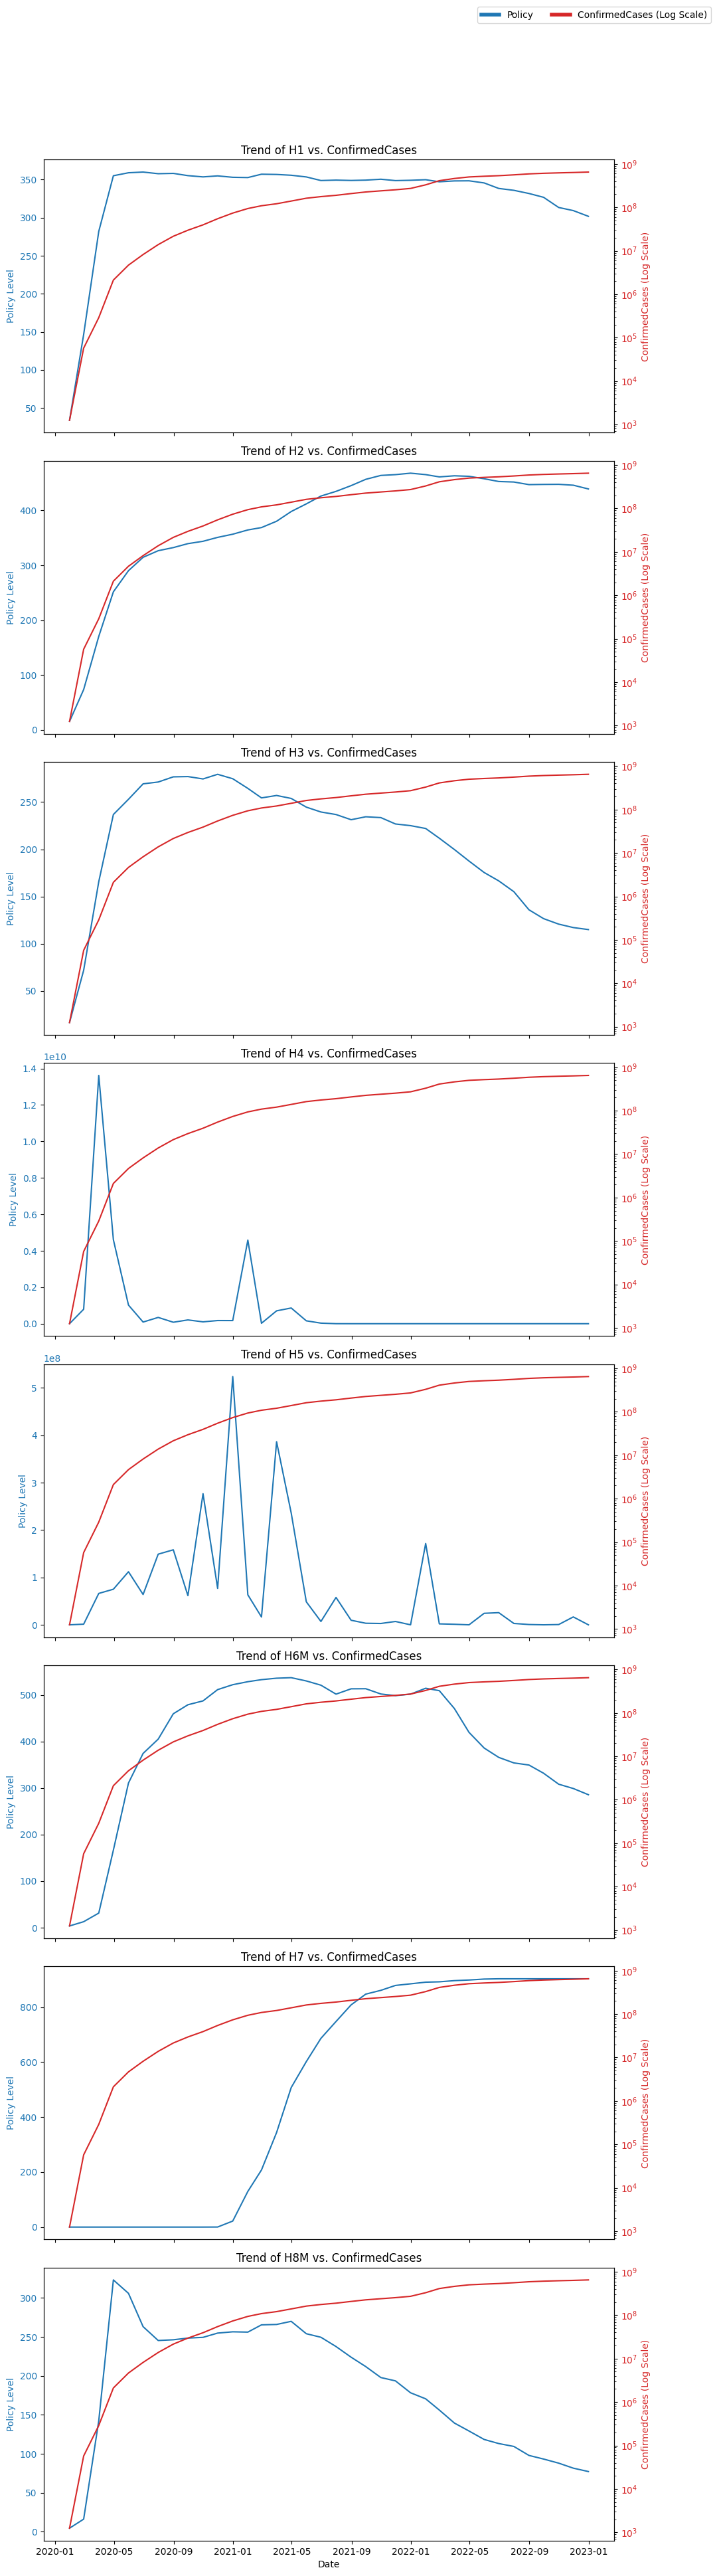

In [300]:
health_policy_columns = ['H1', 'H2', 'H3', 'H4', 'H5', 'H6M', 'H7', 'H8M']

fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(10, 40), sharex=True)

for i, policy in enumerate(health_policy_columns):
    sns.lineplot(ax=axes[i], data=df_monthly, x=df_monthly.index, y=policy, color='tab:blue')
    axes[i].set_ylabel('Policy Level', color='tab:blue')
    axes[i].tick_params(axis='y', labelcolor='tab:blue')

    ax2 = axes[i].twinx()
    sns.lineplot(ax=ax2, data=df_monthly, x=df_monthly.index, y='ConfirmedCases', color='tab:red')
    ax2.set_yscale('log')
    ax2.set_ylabel('ConfirmedCases (Log Scale)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    axes[i].set_title(f'Trend of {policy} vs. ConfirmedCases')



custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4)]


fig.legend(custom_lines, ['Policy', 'ConfirmedCases (Log Scale)'], loc='upper center', ncol=2, bbox_to_anchor=(0.9, 1))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()





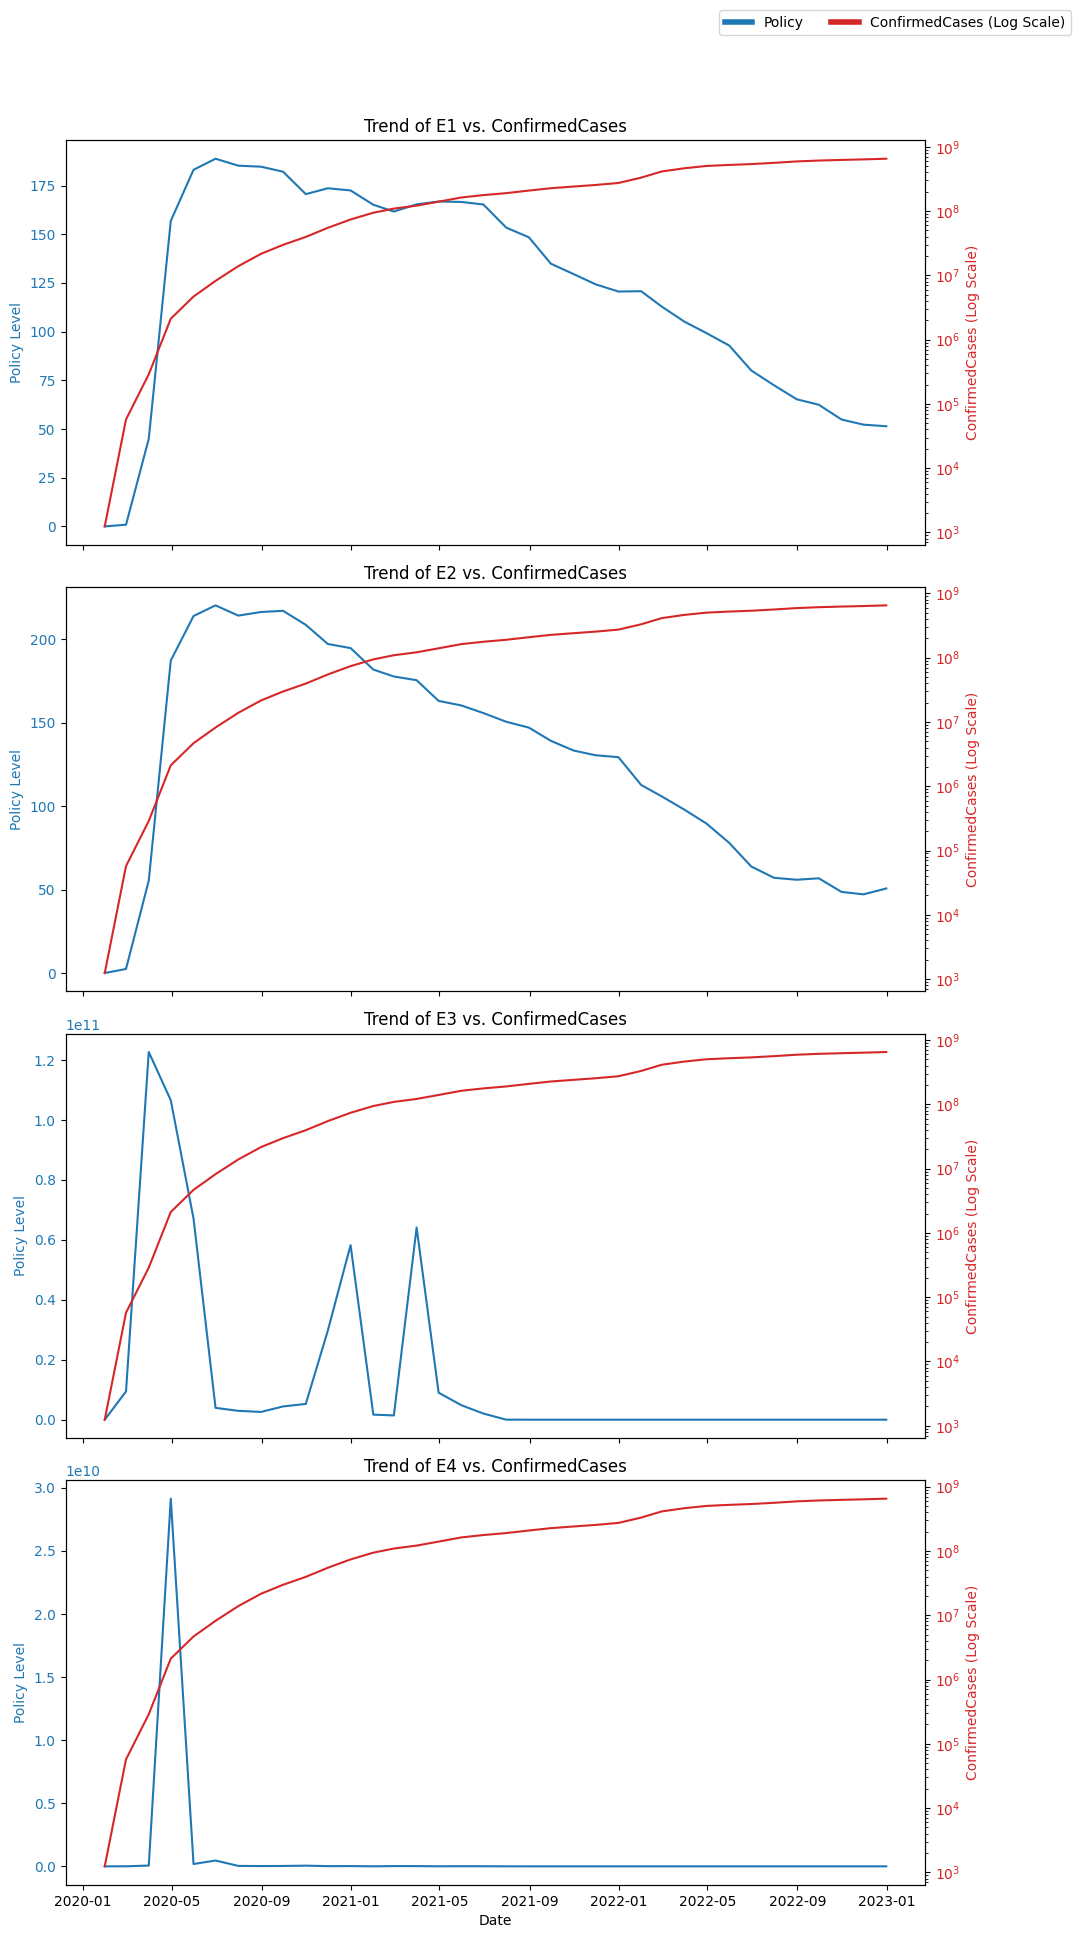

In [301]:
economic_policy_columns = ['E1','E2', 'E3', 'E4']
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 20), sharex=True)

# Iterate over policies and create a line plot for each
for i, policy in enumerate(economic_policy_columns):
    sns.lineplot(ax=axes[i], data=df_monthly, x=df_monthly.index, y=policy, color='tab:blue')
    axes[i].set_ylabel('Policy Level', color='tab:blue')
    axes[i].tick_params(axis='y', labelcolor='tab:blue')

    # Create a secondary y-axis for confirmed cases with log scale
    ax2 = axes[i].twinx()
    sns.lineplot(ax=ax2, data=df_monthly, x=df_monthly.index, y='ConfirmedCases', color='tab:red')
    ax2.set_yscale('log')
    ax2.set_ylabel('ConfirmedCases (Log Scale)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    axes[i].set_title(f'Trend of {policy} vs. ConfirmedCases')


# Create custom lines for the legend
custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4)]


fig.legend(custom_lines, ['Policy', 'ConfirmedCases (Log Scale)'], loc='upper center', ncol=2, bbox_to_anchor=(0.9, 1))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [302]:
df_monthly.head(1)

CountryCode       C1M  C1M_Flag       C2M  C2M_Flag       C3M  \
Date                                                                        
2020-01-31        182.0  2.419355   0.83871  1.129032  0.483871  1.967742   

            C3M_Flag       C4M  C4M_Flag       C5M  C5M_Flag       C6M  \
Date                                                                     
2020-01-31  0.645161  1.612903   0.16129  0.580645       0.0  0.903226   

            C6M_Flag       C7M  C7M_Flag       C8EV   E1  E1_Flag   E2   E3  \
Date                                                                          
2020-01-31  0.419355  0.580645       0.0  18.387097  0.0      0.0  0.0  0.0   

             E4         H1    H1_Flag         H2         H3             H4  \
Date                                                                         
2020-01-31  0.0  33.806452  19.870968  15.516129  16.354839  580780.774194   

                     H5       H6M  H6M_Flag   H7  H7_Flag       H8M  H8M_Flag  \
Date                                                                            
2020-01-31  7966.483871  3.709677  1.870968  0.0      0.0  4.612903  2.096774   

             V1  V2A  V2B  V2C  V2D  V2E_Education  V2F  V2G   V3   V4  \
Date                                                                     
2020-01-31  0.0  0.0  0.0  0.0  0.0            0.0  0.0  0.0  1.0  0.0   

            ConfirmedCases  ConfirmedDeaths  MajorityVaccinated  \
Date                                                              
2020-01-31     1243.774194        28.741935               182.0   

            PopulationVaccinated  StringencyIndex_Average  \
Date                                                        
2020-01-31                   0.0               266.874194   

            GovernmentResponseIndex_Average  ContainmentHealthIndex_Average  \
Date                                                                          
2020-01-31                       247.980323                      283.432903   

            EconomicSupportIndex    Population  GDP_Per_Capita  
Date                                                            
2020-01-31                   0.0  7.840223e+09    3.261143e+06

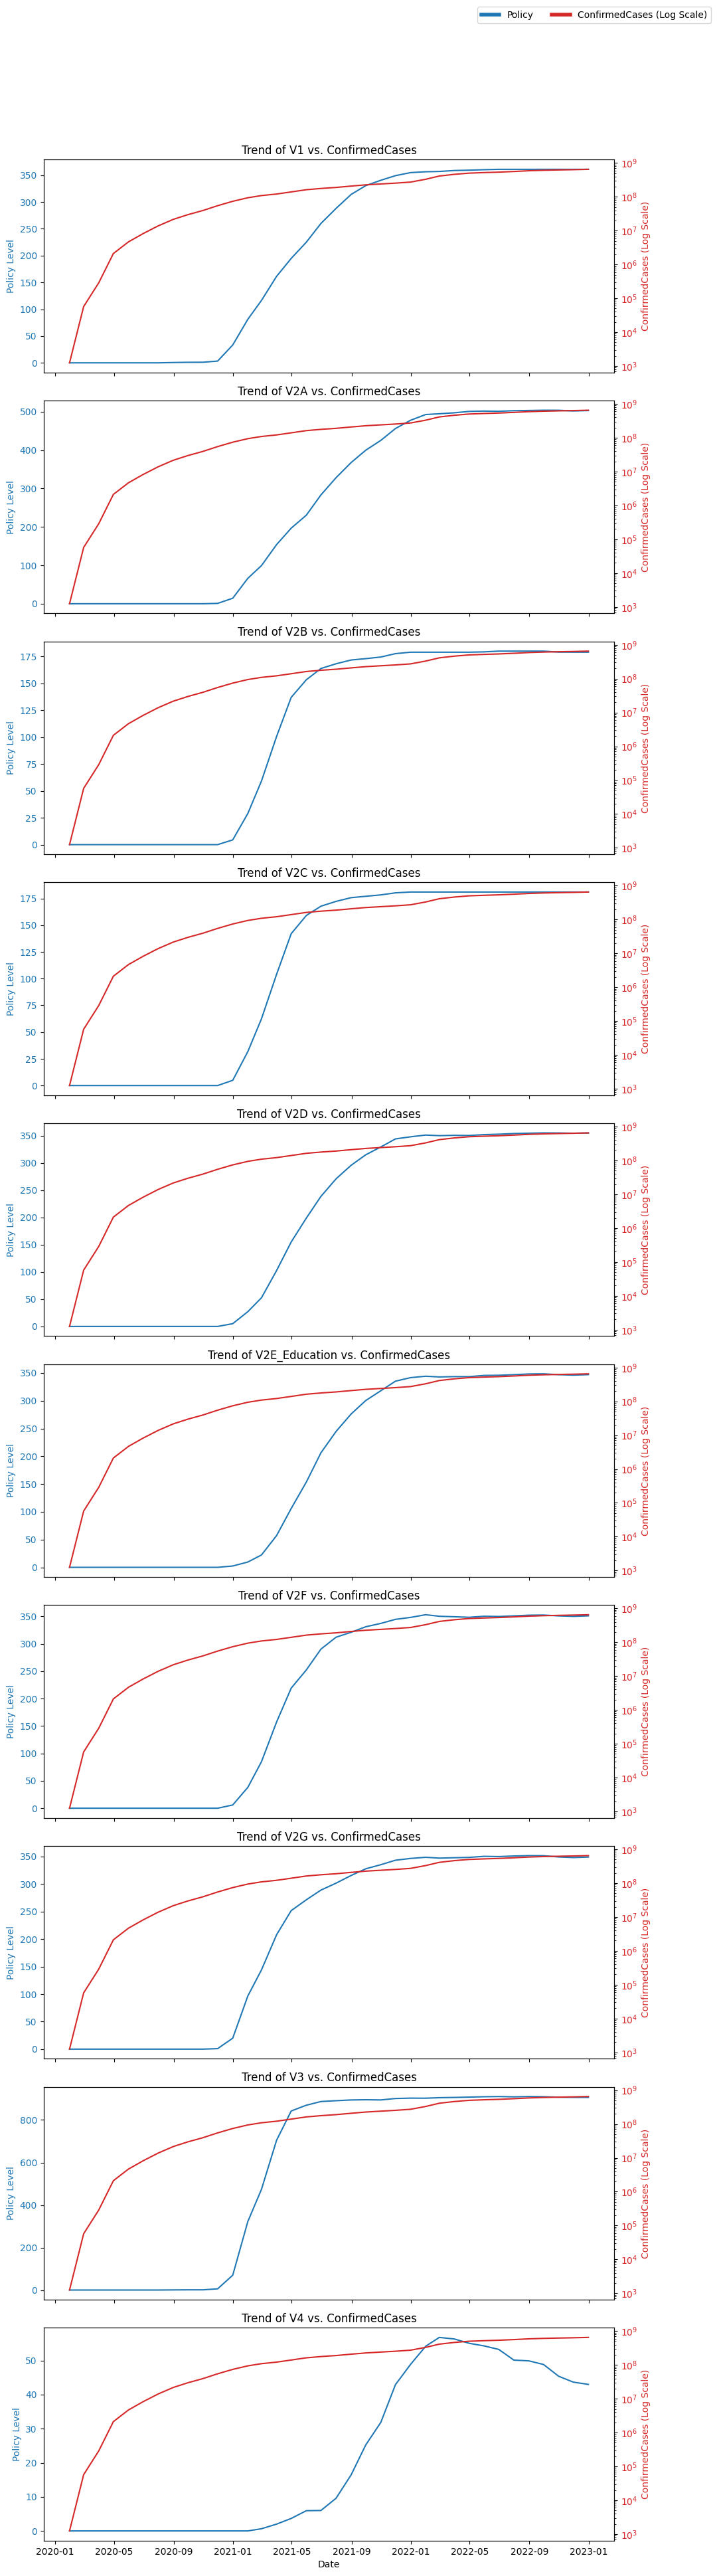

In [303]:
vaccination_policy_columns = ['V1', 'V2A', 'V2B','V2C','V2D', 'V2E_Education','V2F', 'V2G', 'V3', 'V4']
fig, axes = plt.subplots(nrows=len(vaccination_policy_columns), ncols=1, figsize=(10, 40), sharex=True)

# Iterate over policies and create a line plot for each
for i, policy in enumerate(vaccination_policy_columns):
    sns.lineplot(ax=axes[i], data=df_monthly, x=df_monthly.index, y=policy, color='tab:blue')
    axes[i].set_ylabel('Policy Level', color='tab:blue')
    axes[i].tick_params(axis='y', labelcolor='tab:blue')

    # Create a secondary y-axis for confirmed cases with log scale
    ax2 = axes[i].twinx()
    sns.lineplot(ax=ax2, data=df_monthly, x=df_monthly.index, y='ConfirmedCases', color='tab:red')
    ax2.set_yscale('log')
    ax2.set_ylabel('ConfirmedCases (Log Scale)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    axes[i].set_title(f'Trend of {policy} vs. ConfirmedCases')


# Create custom lines for the legend
custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4)]


fig.legend(custom_lines, ['Policy', 'ConfirmedCases (Log Scale)'], loc='upper center', ncol=2, bbox_to_anchor=(0.9, 1))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Main Trend of Confirmed Cases

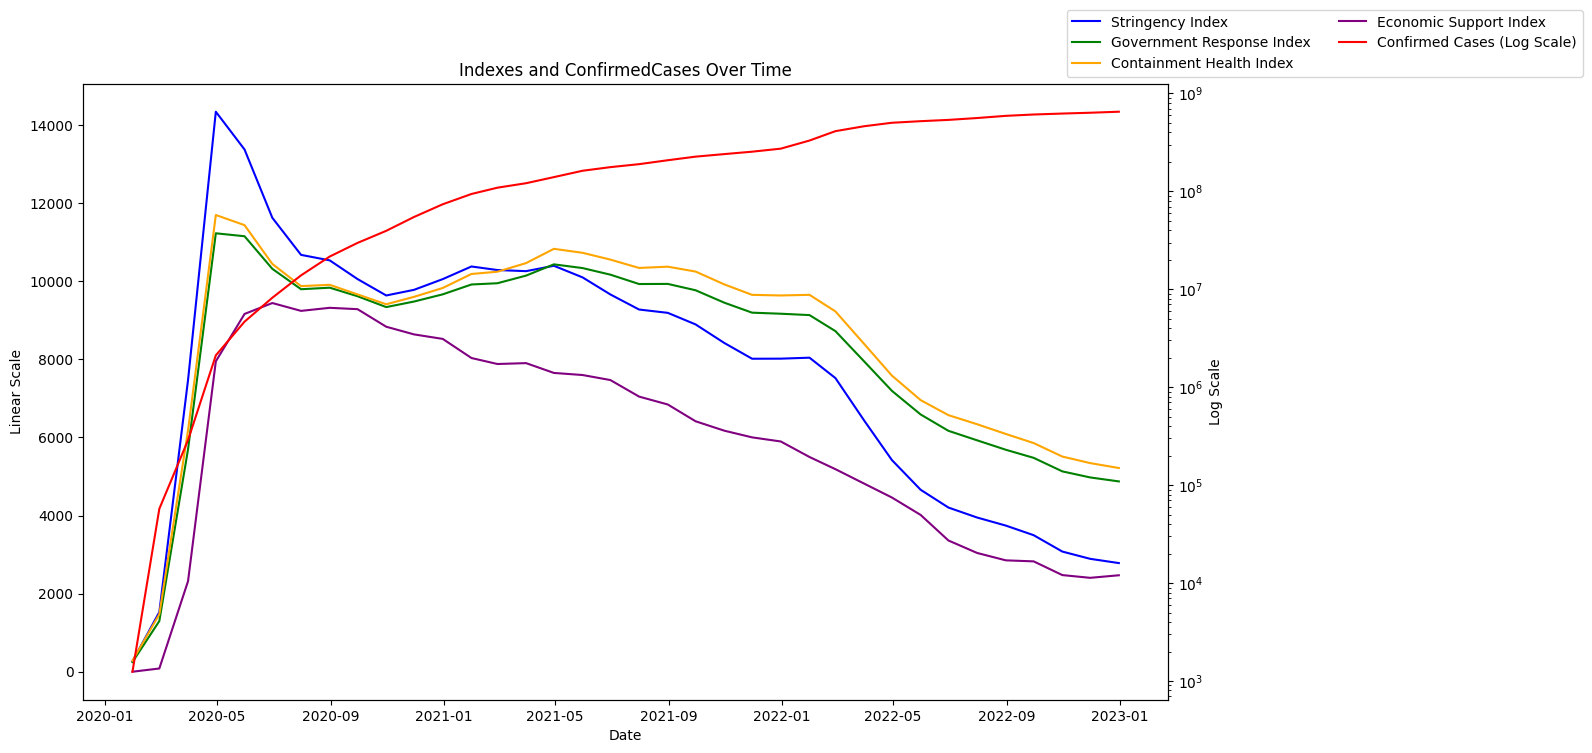

In [304]:
fig, ax1 = plt.subplots(figsize=(14, 8))

colors = ['blue', 'green', 'orange', 'purple', 'red']

sns.lineplot(x='Date', y='StringencyIndex_Average', data=df_monthly, color=colors[0], ax=ax1, label='Stringency Index', legend=None)
sns.lineplot(x='Date', y='GovernmentResponseIndex_Average', data=df_monthly, color=colors[1], ax=ax1, label='Government Response Index', legend=None)
sns.lineplot(x='Date', y='ContainmentHealthIndex_Average', data=df_monthly, color=colors[2], ax=ax1, label='Containment Health Index', legend=None)
sns.lineplot(x='Date', y='EconomicSupportIndex', data=df_monthly, color=colors[3], ax=ax1, label='Economic Support Index', legend=None)

ax1.set_title('Indexes and ConfirmedCases Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Linear Scale')

ax2 = ax1.twinx()
sns.lineplot(x='Date', y='ConfirmedCases', data=df_monthly, color=colors[4], ax=ax2, label='Confirmed Cases (Log Scale)', legend=None)
ax2.set_ylabel('Log Scale')
ax2.set_yscale('log')


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best', ncol=2, bbox_to_anchor=(0.9, 1))

plt.show()

#### Mortality Rate

#### Main Trend for Mortality Rate

### GSA

In [305]:
aggregation_funcs_for_clustering = {}

for column in df.columns:
    if column == 'CountryCode' or pd.api.types.is_datetime64_dtype(df[column]):
      continue
    elif pd.api.types.is_categorical_dtype(df[column]):
      aggregation_funcs_for_clustering[column] = 'count'
    else:
      aggregation_funcs_for_clustering[column] = 'sum'

In [306]:
orld = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df2 = df.groupby('CountryCode').agg(aggregation_funcs_for_clustering)
df2.head()

C1M  C1M_Flag     C2M  C2M_Flag     C3M  C3M_Flag     C4M  \
CountryCode                                                                 
ABW           842.0     548.0  1067.0     710.0  1429.0    1008.0  2691.0   
AFG          1018.0     472.0  1629.0     254.0  1188.0     340.0   700.0   
AGO           891.0     378.0  2056.0     897.0  1352.0     874.0  2396.0   
ALB          1370.0     800.0  1309.0     798.0  1238.0     783.0  2685.0   
AND           860.0     706.0  1208.0     748.0  1057.0     727.0  1888.0   

             C4M_Flag    C5M  C5M_Flag     C6M  C6M_Flag     C7M  C7M_Flag  \
CountryCode                                                                  
ABW             865.0    0.0       0.0   724.0     456.0   235.0     167.0   
AFG             135.0  732.0     181.0   352.0       0.0   370.0      63.0   
AGO             510.0  673.0     625.0   996.0     750.0  1425.0     348.0   
ALB             783.0  262.0      73.0  1276.0     720.0   272.0     122.0   
AND             491.0  652.0     652.0   146.0     146.0    30.0      30.0   

               C8EV      E1  E1_Flag      E2           E3           E4  \
CountryCode                                                              
ABW          1486.0   802.0    158.0   532.0  271700000.0          0.0   
AFG          1488.0     0.0      0.0    31.0          0.0  152400000.0   
AGO          2623.0   386.0    386.0   184.0    9000000.0          0.0   
ALB          1293.0   753.0    644.0   841.0  540068949.8          0.0   
AND          1277.0  1492.0    606.0  1050.0  441291382.9  473499125.0   

                 H1  H1_Flag      H2      H3           H4           H5  \
CountryCode                                                              
ABW          2038.0   1019.0   993.0  1384.0          0.0          0.0   
AFG           756.0    531.0   705.0   396.0  248977750.0  113000000.0   
AGO          1907.0   1013.0  2244.0   306.0  240000000.0   88000000.0   
ALB          1889.0   1052.0  2073.0   995.0   26000000.0    6900000.0   
AND          1731.0    908.0  2952.0  1674.0    2621785.5          0.0   

                H6M  H6M_Flag      H7  H7_Flag     H8M  H8M_Flag    V1   V2A  \
CountryCode                                                                    
ABW          1965.0     866.0  3237.0    683.0  1035.0     401.0  1299  1902   
AFG          2439.0     921.0  3193.0    677.0   572.0     122.0  1324  1302   
AGO          3042.0     997.0  3118.0    668.0   454.0     351.0  1238  1612   
ALB          2537.0     999.0  2972.0    720.0  1648.0     810.0  1286  1651   
AND          2388.0     958.0  3267.0    711.0  1775.0    1012.0  1300  1783   

             V2B  V2C     V2D  V2E_Education     V2F     V2G    V3     V4  \
CountryCode                                                                 
ABW          683  683  1299.0         1232.0  1366.0  1366.0  3415    0.0   
AFG          625  625  1250.0         1281.0  1302.0  1302.0  3385    0.0   
AGO          661  661  1065.0         1072.0  1239.0  1072.0  3340  457.0   
ALB          713  713  1086.0         1185.0  1258.0  1247.0  3600  458.0   
AND          702  702  1268.0         1198.0  1314.0  1422.0  3465    0.0   

             ConfirmedCases  ConfirmedDeaths  MajorityVaccinated  \
CountryCode                                                        
ABW              19056043.0         128724.0                1096   
AFG             115803695.0        4885625.0                1096   
AGO              52873632.0        1100527.0                1096   
ALB             162838359.0        2240822.0                1096   
AND              21294890.0         115970.0                1096   

             PopulationVaccinated  StringencyIndex_Average  \
CountryCode                                                  
ABW                      43798.33                 41922.31   
AFG                       6615.74                 30024.46   
AGO                       7797.50                 56577.42   
ALB

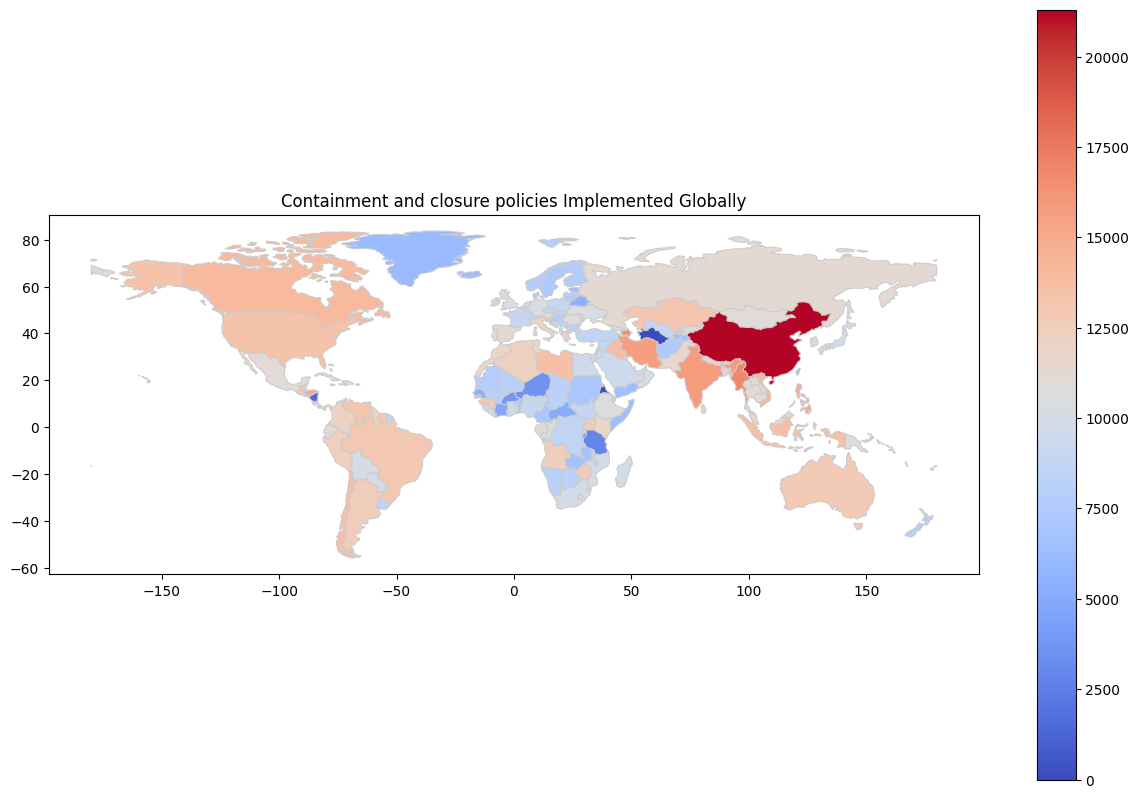

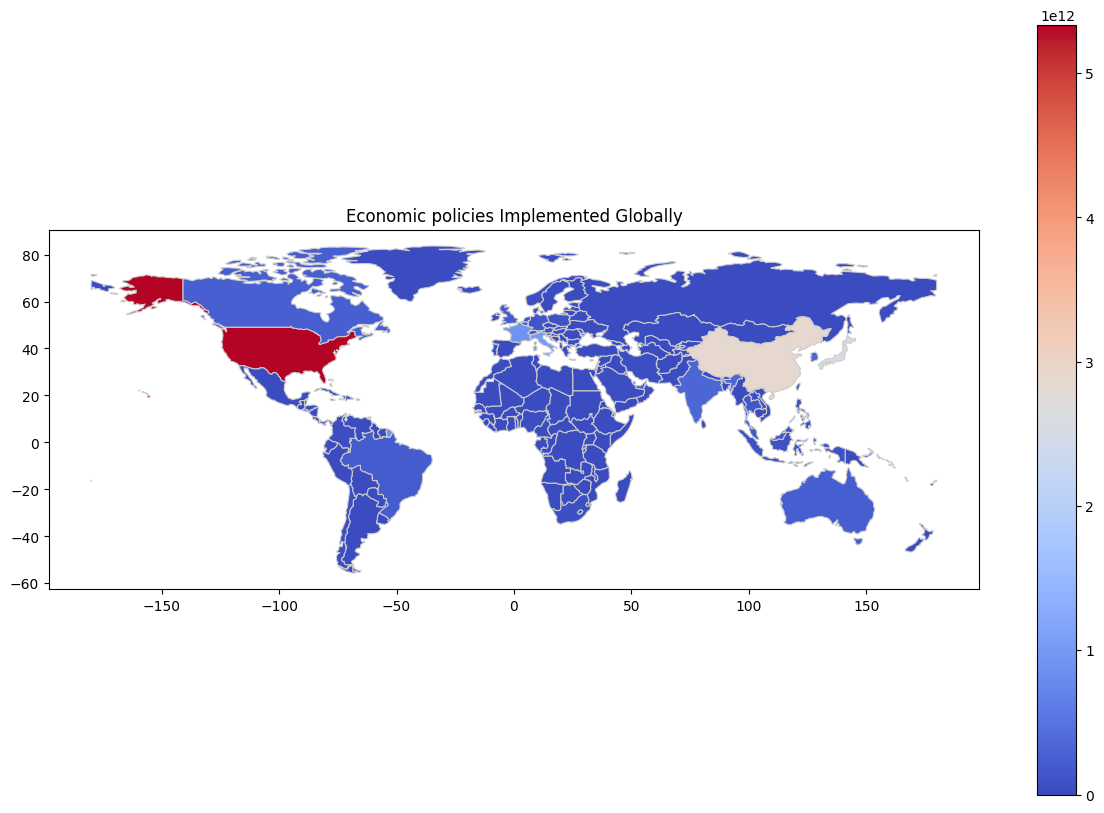

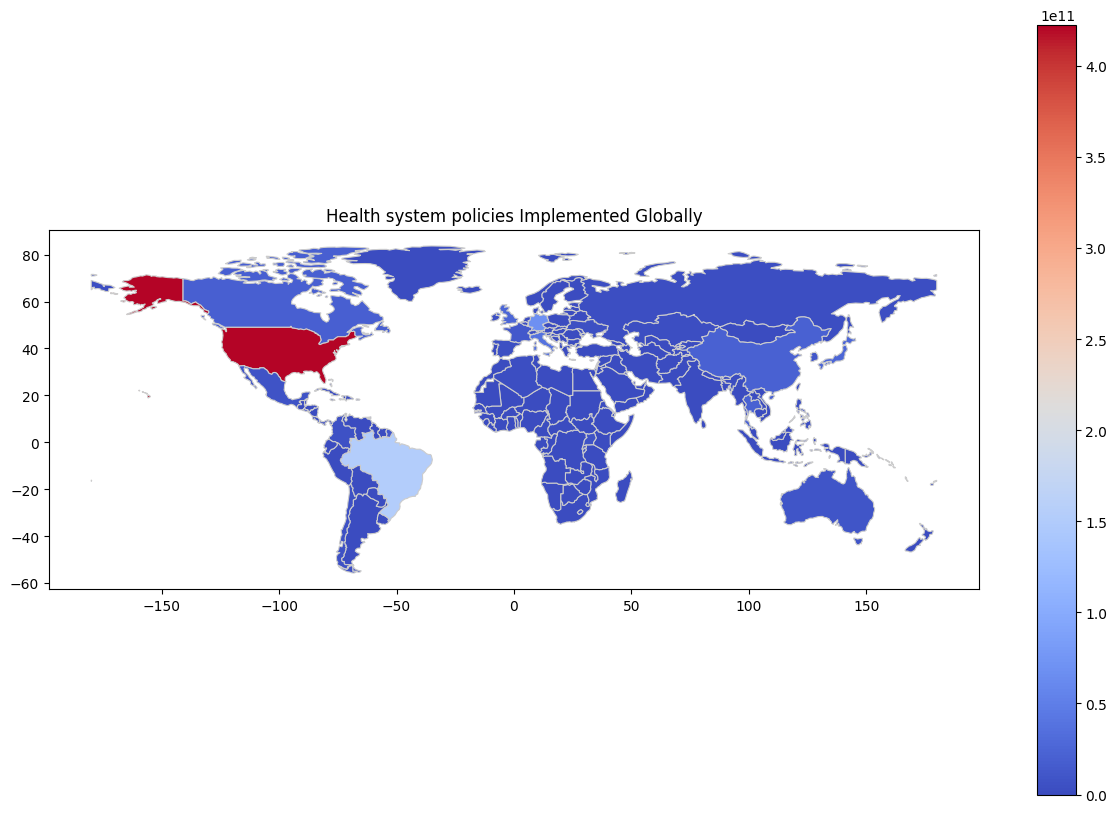

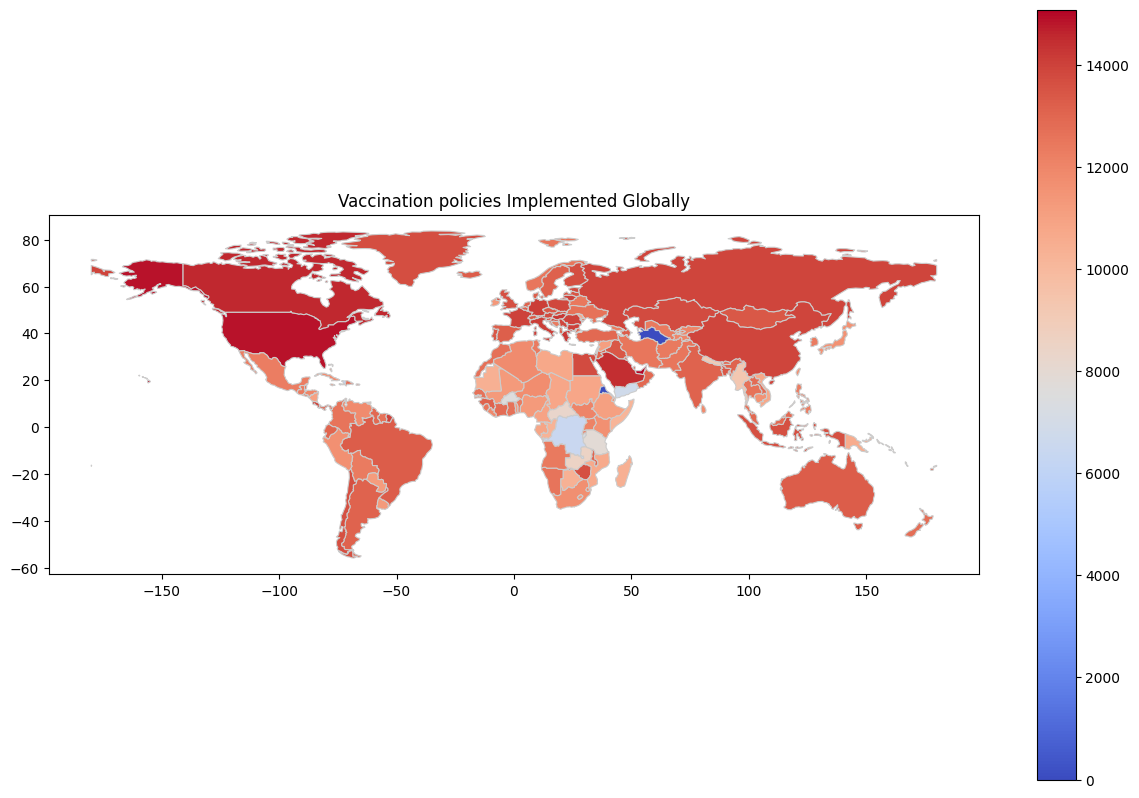

In [307]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

df2 = df.groupby('CountryCode').agg(aggregation_funcs_for_clustering)


df2['policy_c'] = df2[containment_policy_columns].sum(axis=1)
df2['policy_e'] = df2[economic_policy_columns].sum(axis=1)
df2['policy_h'] = df2[health_policy_columns].sum(axis=1)
df2['policy_v'] = df2[vaccination_policy_columns].sum(axis=1)

world = world.merge(df2, left_on='iso_a3', right_on='CountryCode')

policy_dict = {
    'c': ['policy_c', 'Containment and closure policies'],
    'e': ['policy_e', 'Economic policies'],
    'h': ['policy_h', 'Health system policies'],
    'v': ['policy_v', 'Vaccination policies']
}

for key, value in policy_dict.items():
  fig, ax = plt.subplots(1, 1, figsize=(15, 10))
  world.plot(column = policy_dict[key][0], cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, aspect='equal')
  ax.set_title(f'{policy_dict[key][1]} Implemented Globally')
  plt.show()


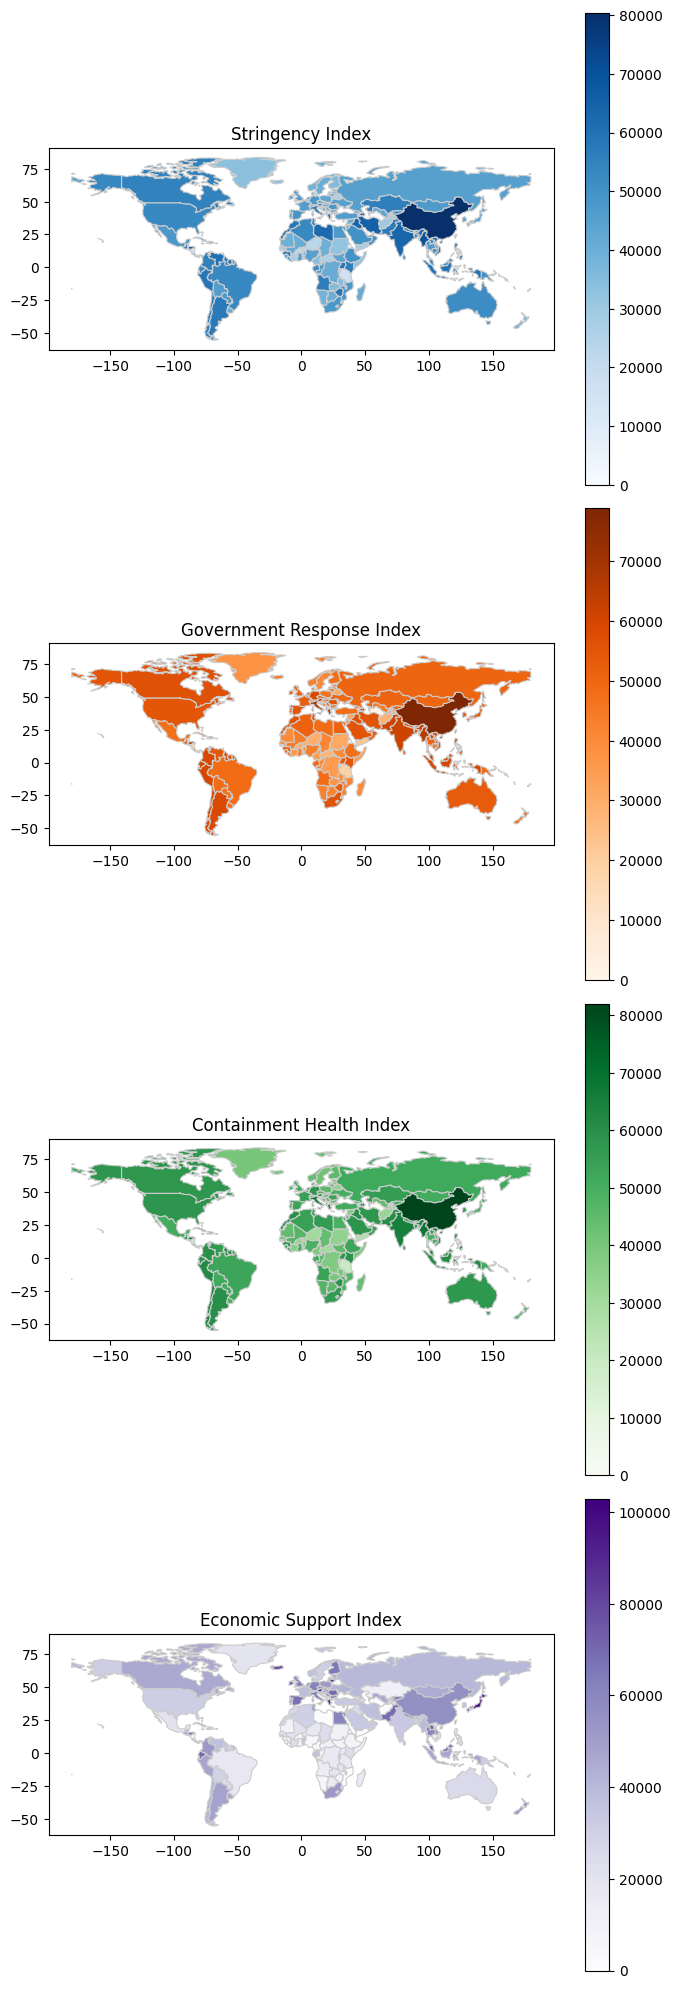

In [308]:
fig, axs = plt.subplots(4, 1, figsize=(7, 20))

world.plot(column='StringencyIndex_Average', cmap='Blues', linewidth=0.8, ax=axs[0], edgecolor='0.8', legend=True)
axs[0].set_title('Stringency Index')

world.plot(column='GovernmentResponseIndex_Average', cmap='Oranges', linewidth=0.8, ax=axs[1], edgecolor='0.8', legend=True)
axs[1].set_title('Government Response Index')

world.plot(column='ContainmentHealthIndex_Average', cmap='Greens', linewidth=0.8, ax=axs[2], edgecolor='0.8', legend=True)
axs[2].set_title('Containment Health Index')

world.plot(column='EconomicSupportIndex', cmap='Purples', linewidth=0.8, ax=axs[3], edgecolor='0.8', legend=True)
axs[3].set_title('Economic Support Index')

plt.tight_layout()
plt.show()


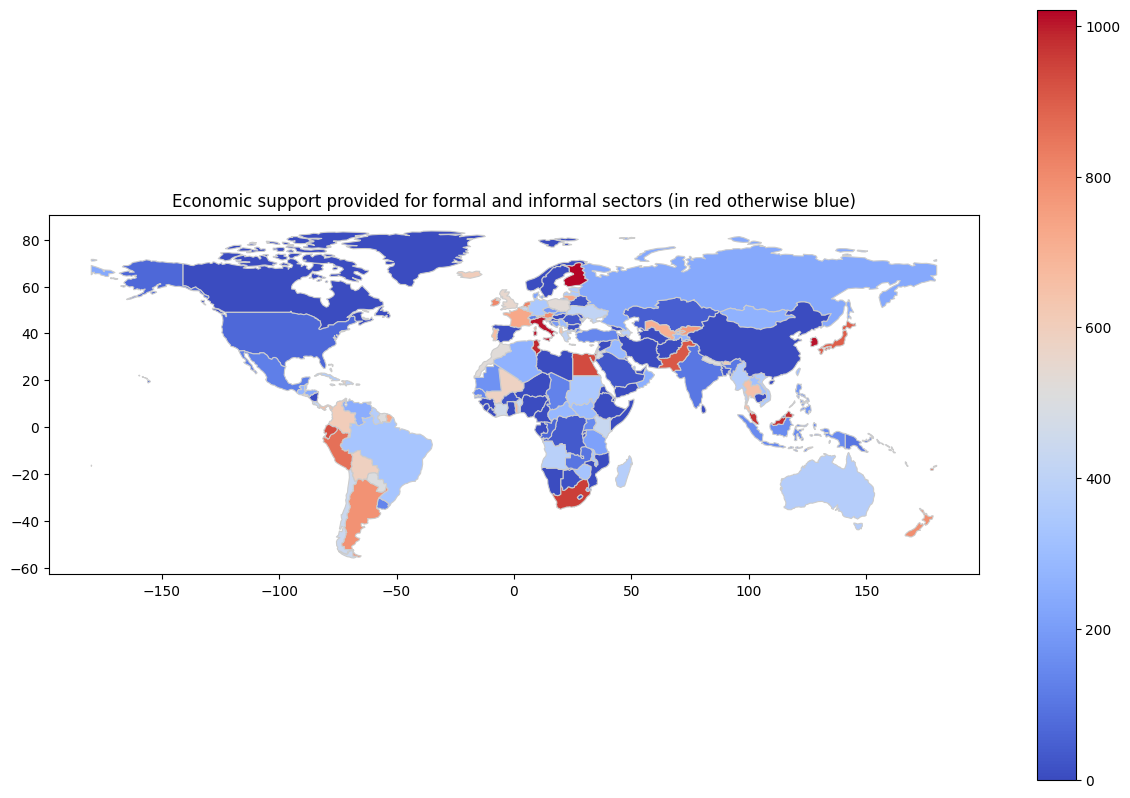

In [309]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='E1_Flag', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, aspect='equal')
ax.set_title('Economic support provided for formal and informal sectors (in red otherwise blue)')
plt.show()

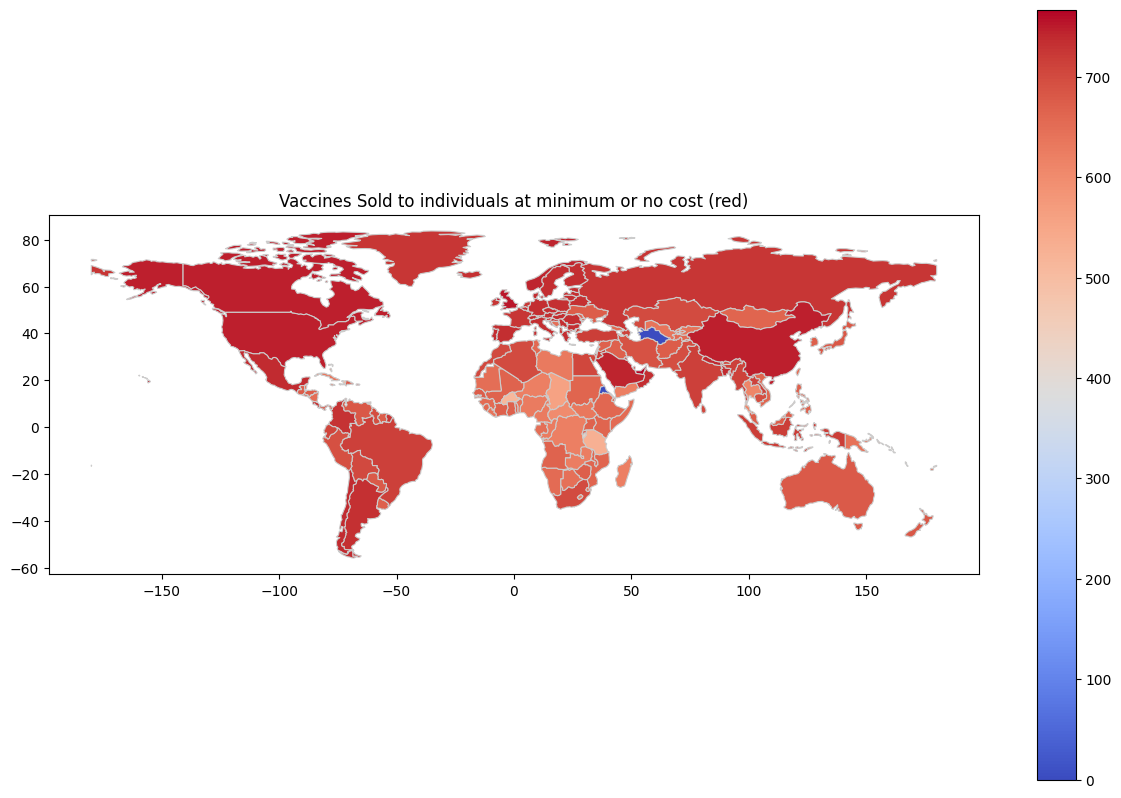

In [310]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='H7_Flag', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, aspect='equal')
ax.set_title('Vaccines Sold to individuals at minimum or no cost (red)')
plt.show()